In [119]:
from utils import *
from chess_feature_extractors import *
import matplotlib.pyplot as plt
from IPython.display import SVG, display
import chess.svg
board_feats_disagreements = pd.read_csv("../teacher_set_disagreement.csv")
games_df = pd.read_csv("./teacher-set.csv")
unique_games_df = games_df.drop_duplicates(subset='game')
grouped_df = unique_games_df.groupby('game')['result'].value_counts().unstack(fill_value=0)
total_wins = grouped_df['win'].sum()
total_losses = grouped_df['lose'].sum()
total_draws = grouped_df['draw'].sum()
win_percent = total_wins / (total_wins + total_draws + total_losses) * 100
print(f"Total wins number: {total_wins}\n"
      f"Total losses number: {total_losses}\n"
      f"Total draws number: {total_draws}")
print(f"Win percent: {win_percent.__round__(3)}%")

Total wins number: 42421
Total losses number: 28252
Total draws number: 11146
Win percent: 51.847%


In [120]:
grouped_df = games_df.groupby('game')['contributor'].value_counts().unstack(fill_value=0)
grouped_df['moves_num'] = grouped_df['agreed'] + grouped_df['leela10b2500'] + grouped_df['maia1200']
grouped_df['agreed_percent'] = ((grouped_df['agreed'] / grouped_df['moves_num']) * 100).__round__(3)
grouped_df['leela_percent'] = ((grouped_df['leela10b2500'] / grouped_df['moves_num']) * 100).__round__(3)
grouped_df['maia_percent'] = ((grouped_df['maia1200'] / grouped_df['moves_num']) * 100).__round__(3)

print(f"Average percent of agreed moves in a game: {grouped_df['agreed_percent'].mean().__round__(3)}%, variance: {grouped_df['agreed_percent'].var().__round__(3)}")
print(f"Average percent of Leela moves in a game: {grouped_df['leela_percent'].mean().__round__(3)}%, variance: {grouped_df['leela_percent'].var().__round__(3)}")
print(f"Average percent of Maia moves in a game: {grouped_df['maia_percent'].mean().__round__(3)}%, variance: {grouped_df['maia_percent'].var().__round__(3)}")

Average percent of agreed moves in a game: 76.123%, variance: 85.182
Average percent of Leela moves in a game: 13.334%, variance: 41.658
Average percent of Maia moves in a game: 10.543%, variance: 35.357


In [121]:
win_df = games_df[games_df['result'] == 'win']
win_df = win_df.groupby('game')['contributor'].value_counts().unstack(fill_value=0)
win_df['moves_num'] = win_df['agreed'] + win_df['leela10b2500'] + win_df['maia1200']
win_df['agreed_percent'] = ((win_df['agreed'] / win_df['moves_num']) * 100).__round__(3)
win_df['leela_percent'] = ((win_df['leela10b2500'] / win_df['moves_num']) * 100).__round__(3)
win_df['maia_percent'] = ((win_df['maia1200'] / win_df['moves_num']) * 100).__round__(3)

print(f"Average percent of agreed moves in won games: {win_df['agreed_percent'].mean().__round__(3)}%, variance: {win_df['agreed_percent'].var().__round__(3)}")
print(f"Average percent of Leela moves in won games: {win_df['leela_percent'].mean().__round__(3)}%, variance: {win_df['leela_percent'].var().__round__(3)}")
print(f"Average percent of Maia moves in won games: {win_df['maia_percent'].mean().__round__(3)}%, variance: {win_df['maia_percent'].var().__round__(3)}")

Average percent of agreed moves in won games: 73.15%, variance: 93.751
Average percent of Leela moves in won games: 14.65%, variance: 44.874
Average percent of Maia moves in won games: 12.199%, variance: 39.032


In [122]:
lose_df = games_df[games_df['result'] == 'lose']
lose_df = lose_df.groupby('game')['contributor'].value_counts().unstack(fill_value=0)
lose_df['moves_num'] = lose_df['agreed'] + lose_df['leela10b2500'] + lose_df['maia1200']
lose_df['agreed_percent'] = ((lose_df['agreed'] / lose_df['moves_num']) * 100).__round__(3)
lose_df['leela_percent'] = ((lose_df['leela10b2500'] / lose_df['moves_num']) * 100).__round__(3)
lose_df['maia_percent'] = ((lose_df['maia1200'] / lose_df['moves_num']) * 100).__round__(3)

print(f"Average percent of agreed moves in lost games: {lose_df['agreed_percent'].mean().__round__(3)}%, variance: {lose_df['agreed_percent'].var().__round__(3)}")
print(f"Average percent of Leela moves in lost games: {lose_df['leela_percent'].mean().__round__(3)}%, variance: {lose_df['leela_percent'].var().__round__(3)}")
print(f"Average percent of Maia moves in lost games: {lose_df['maia_percent'].mean().__round__(3)}%, variance: {lose_df['maia_percent'].var().__round__(3)}")

Average percent of agreed moves in lost games: 79.139%, variance: 57.589
Average percent of Leela moves in lost games: 12.014%, variance: 36.559
Average percent of Maia moves in lost games: 8.847%, variance: 26.235


General statistics of the scores and confidence for each bot:

In [123]:
disagreement_df = games_df[games_df['contributor'].isin(['maia1200', 'leela10b2500'])]
selected = ['maia1200_eval', 'maia1200_conf', 'leela10b2500_eval', 'leela10b2500_conf']
conf_eval = disagreement_df[selected]
conf_eval.describe()

,maia1200_eval,maia1200_conf,leela10b2500_eval,leela10b2500_conf
count,913481.000000,913481.000000,913481.000000,913481.000000
mean,0.613627,0.923579,0.636168,0.896739
std,0.391356,0.146765,0.381055,0.167055
min,0.000000,0.200000,0.000000,0.200000
25%,0.340000,1.000000,0.430500,0.800000
50%,0.569500,1.000000,0.626500,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [124]:
maia_df = games_df.loc[games_df['contributor'] == 'maia1200']
leela_df = games_df.loc[games_df['contributor'] == 'leela10b2500']
maia_df = maia_df[selected]
leela_df = leela_df[selected]

print("Confidence and eval stats when Maia is chosen:")
maia_df.describe()

Confidence and eval stats when Maia is chosen:


,maia1200_eval,maia1200_conf,leela10b2500_eval,leela10b2500_conf
count,404468.000000,404468.000000,404468.000000,404468.000000
mean,0.670127,0.926478,0.620942,0.890375
std,0.382547,0.144394,0.401545,0.170758
min,0.000000,0.200000,0.000000,0.200000
25%,0.466000,1.000000,0.302500,0.800000
50%,0.954000,1.000000,0.629000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [125]:
print("Confidence and eval stats when Leela is chosen:")
leela_df.describe()

Confidence and eval stats when Leela is chosen:


,maia1200_eval,maia1200_conf,leela10b2500_eval,leela10b2500_conf
count,509013.000000,509013.000000,509013.000000,509013.000000
mean,0.568731,0.921275,0.648267,0.901796
std,0.392460,0.148581,0.363497,0.163877
min,0.000000,0.200000,0.000000,0.200000
25%,0.198500,0.800000,0.466000,0.800000
50%,0.510000,1.000000,0.626500,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


Now we'll calculate the Pearson correlation between eval and confidence for each bot:

In [126]:
correlation_matrix = disagreement_df.corr()
maia_conf_eval_correlation = correlation_matrix.loc['maia1200_conf', 'maia1200_eval']
print(f"Correlation between Maia confidence and eval: {maia_conf_eval_correlation.__round__(3)}")
leela_conf_eval_correlation = correlation_matrix.loc['leela10b2500_conf', 'leela10b2500_eval']
print(f"Correlation between Leela confidence and eval: {leela_conf_eval_correlation.__round__(3)}")

Correlation between Maia confidence and eval: -0.015
Correlation between Leela confidence and eval: 0.015


/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_14860/2137939842.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = disagreement_df.corr()


Next we'll look at the Pearson correlation of confidence and move number and of eval and move number.

In [127]:
maia_conf_move_correlation = correlation_matrix.loc['maia1200_conf', 'ply']
maia_eval_move_correlation = correlation_matrix.loc['maia1200_eval', 'ply']
leela_conf_move_correlation = correlation_matrix.loc['leela10b2500_conf', 'ply']
leela_eval_move_correlation = correlation_matrix.loc['leela10b2500_eval', 'ply']

print(f"Correlation between Maia confidence and move number: {maia_conf_move_correlation.__round__(3)}")
print(f"Correlation between Maia eval and move number: {maia_eval_move_correlation.__round__(3)}")
print(f"Correlation between Leela confidence and move number: {leela_conf_move_correlation.__round__(3)}")
print(f"Correlation between Leela eval and move number: {leela_eval_move_correlation.__round__(3)}")

Correlation between Maia confidence and move number: -0.019
Correlation between Maia eval and move number: 0.213
Correlation between Leela confidence and move number: -0.2
Correlation between Leela eval and move number: 0.181


In [128]:
disagreement_df['dis_num'] = 0
cur_game = -1
cur_count = 1
for ind, row in disagreement_df.iterrows():
    cur_count += 1
    if row['game'] != cur_game:
        cur_game = row['game']
        cur_count = 1
    disagreement_df.loc[ind, 'dis_num'] = cur_count

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_14860/2503335194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disagreement_df['dis_num'] = 0


Text(0.5, 1.0, 'Histogram of Disagreements Numbers')

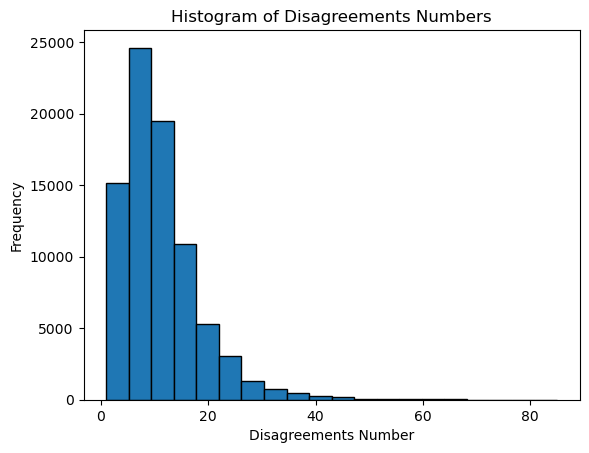

In [129]:
max_dis_per_game = disagreement_df.groupby('game')['dis_num'].max()
plt.hist(max_dis_per_game, bins=20, edgecolor='black')
plt.xlabel('Disagreements Number')
plt.ylabel('Frequency')
plt.title('Histogram of Disagreements Numbers')

In [130]:
disagreement_df['dis_in_game'] = disagreement_df['game'].map(max_dis_per_game)

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_14860/4267267249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disagreement_df['dis_in_game'] = disagreement_df['game'].map(max_dis_per_game)


/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_14860/37548317.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_range_9_14 = df_range_9_14[disagreement_df['dis_in_game'] > 8]


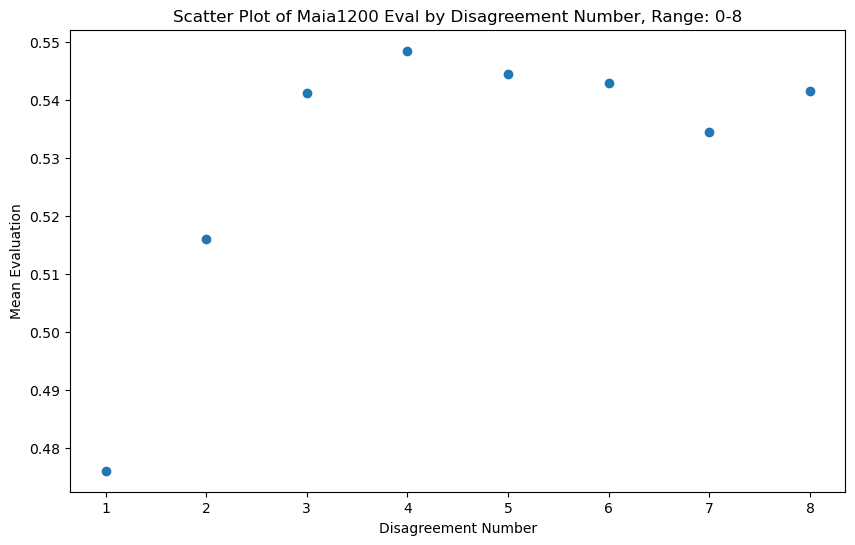

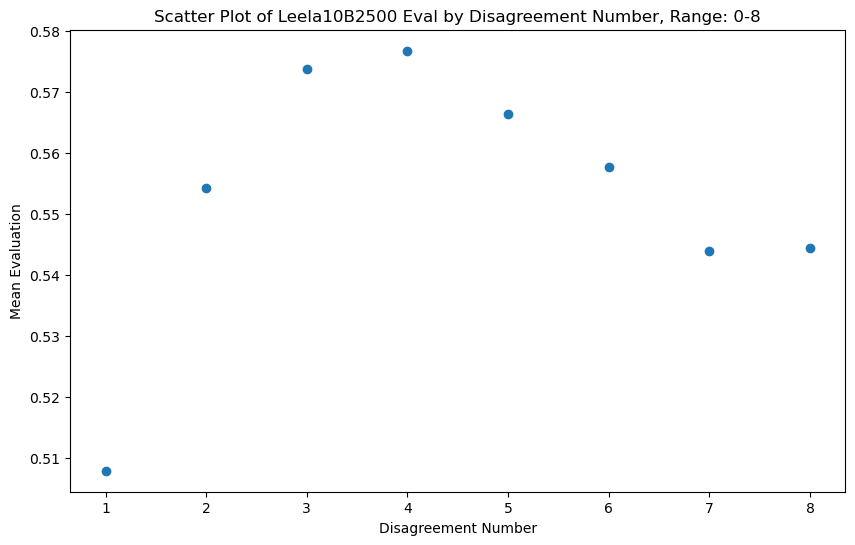

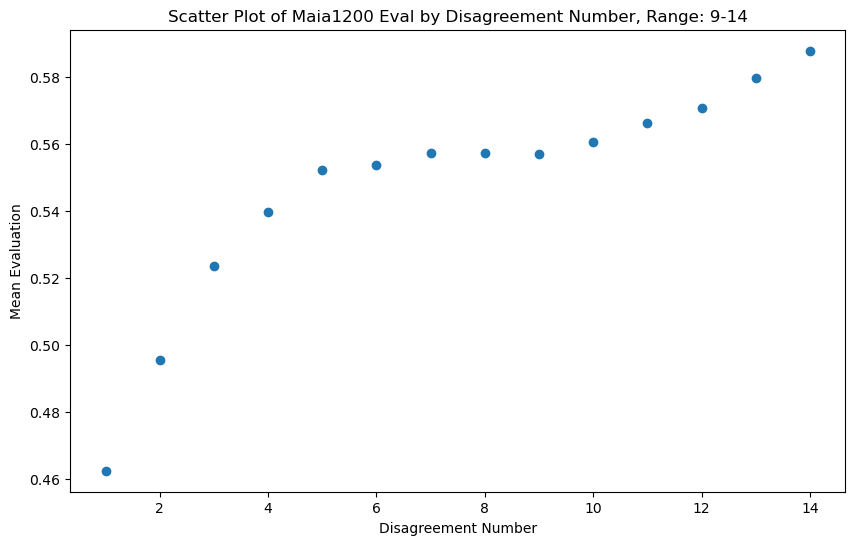

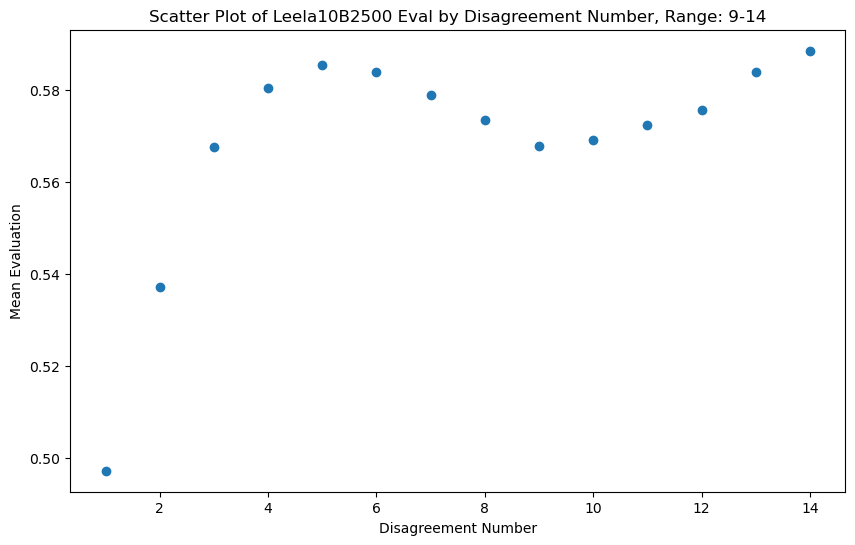

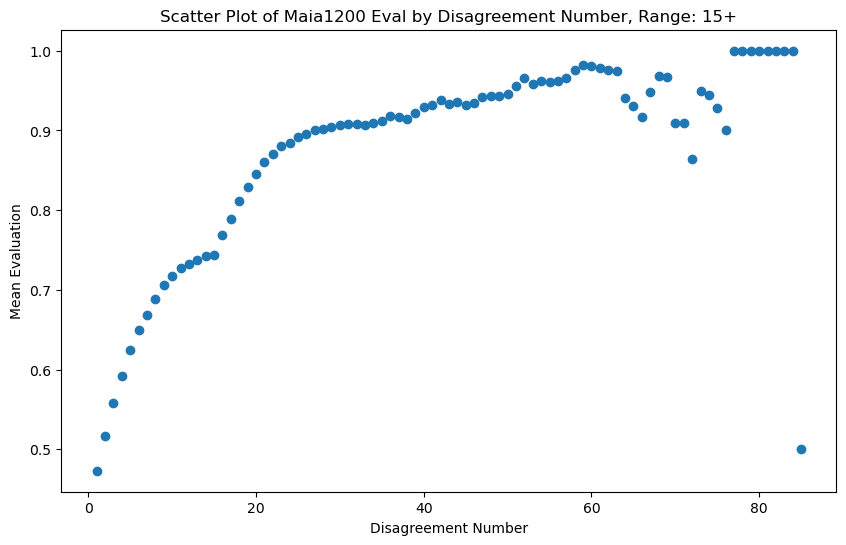

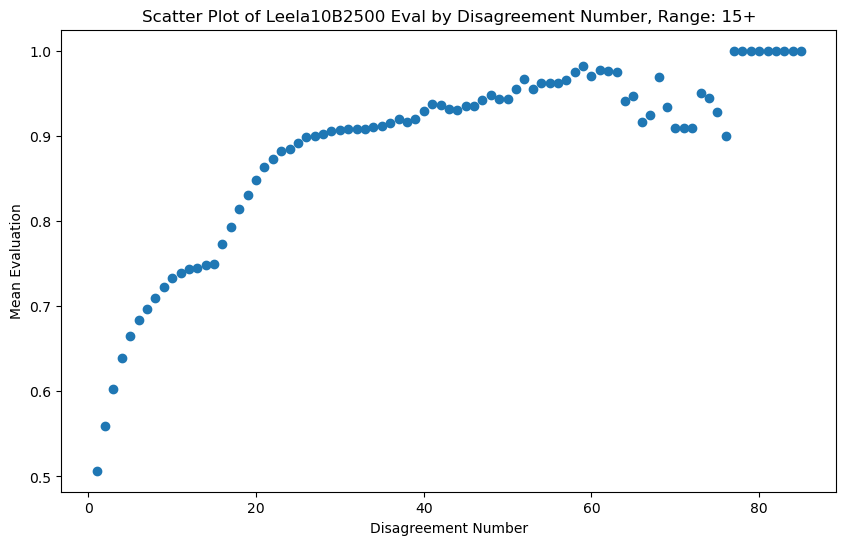

In [131]:
df_range_0_8 = disagreement_df[disagreement_df['dis_in_game'] <= 8]
df_range_9_14 = disagreement_df[disagreement_df['dis_in_game'] <= 14]
df_range_9_14 = df_range_9_14[disagreement_df['dis_in_game'] > 8]
df_range_15_plus = disagreement_df[disagreement_df['dis_in_game'] >= 15]
for df in [(df_range_0_8, "0-8"), (df_range_9_14, "9-14"), (df_range_15_plus, "15+")]:
    for eval_column in ['maia1200_eval', 'leela10b2500_eval']:
        mean_evaluation_by_move = df[0].groupby('dis_num')[eval_column].mean().reset_index()
        plt.figure(figsize=(10, 6))
        plt.scatter(mean_evaluation_by_move['dis_num'], mean_evaluation_by_move[eval_column])
        plt.title(f"Scatter Plot of {eval_column.replace('_', ' ').title()} by Disagreement Number, Range: {df[1]}")
        plt.xlabel('Disagreement Number')
        plt.ylabel('Mean Evaluation')

Text(0, 0.5, 'Mean Confidence')

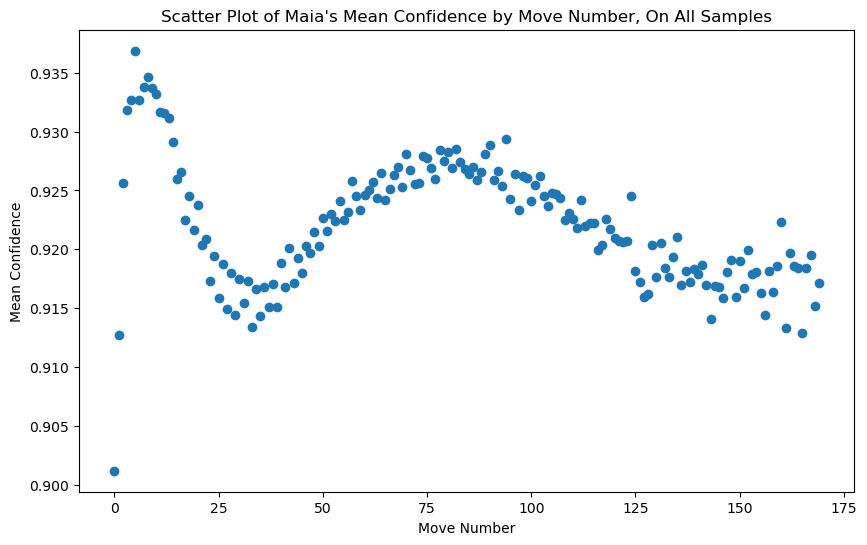

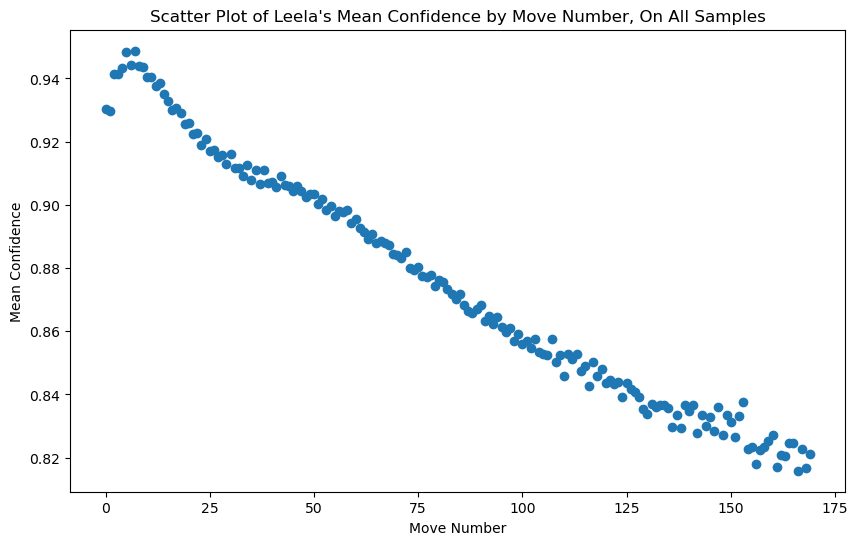

In [132]:
mean_evaluation_by_move = games_df.groupby('ply')['maia1200_conf'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 170]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['maia1200_conf'], label="Maia's Confidence")
plt.title("Scatter Plot of Maia's Mean Confidence by Move Number, On All Samples")
plt.xlabel('Move Number')
plt.ylabel('Mean Confidence')
mean_evaluation_by_move = games_df.groupby('ply')['leela10b2500_conf'].mean().reset_index()
mean_evaluation_by_move = mean_evaluation_by_move[mean_evaluation_by_move['ply'] < 170]
plt.figure(figsize=(10, 6))
plt.scatter(mean_evaluation_by_move['ply'], mean_evaluation_by_move['leela10b2500_conf'], label="Leela's Confidence")
plt.title("Scatter Plot of Leela's Mean Confidence by Move Number, On All Samples")
plt.xlabel('Move Number')
plt.ylabel('Mean Confidence')

In [133]:
print("Mean values of board features when Maia is better:")
for i in range(len(mean_vec_maia)):
    print(
        f"Feature: {board_feature_names[i]}, mean: {maia_mean_vec_teacher[i].__round__(3)}, var: {maia_var_vec_teacher[i].__round__(3)}")

Mean values of board features when Maia is better:
Feature: color, mean: 0.51, var: 0.25
Feature: move_num, mean: 32.657, var: 1162.204
Feature: legal_moves_player, mean: 33.256, var: 125.487
Feature: legal_moves_opponent, mean: 32.793, var: 110.898
Feature: legal_captures_player, mean: 2.116, var: 2.769
Feature: legal_captures_opponent, mean: 2.167, var: 2.436
Feature: in_check, mean: 0.028, var: 0.028
Feature: check_to_give_player, mean: 0.52, var: 0.25
Feature: check_to_give_opponent, mean: 0.475, var: 0.249
Feature: queen_threatened_player, mean: 0.054, var: 0.051
Feature: queen_threatened_opponent, mean: 0.021, var: 0.021
Feature: castling_rights_player, mean: 0.082, var: 0.075
Feature: castling_rights_opponent, mean: 0.105, var: 0.094
Feature: enough_material_to_win_player, mean: 0.002, var: 0.002
Feature: enough_material_to_win_opponent, mean: 0.012, var: 0.012
Feature: number_pieces_player, mean: 10.698, var: 12.659
Feature: number_pieces_opponent, mean: 10.474, var: 14.634
Fea

In [134]:
print("Mean values of board features when Leela is better:")
for i in range(len(mean_vec_leela)):
    print(f"Feature: {board_feature_names[i]}, mean: {leela_mean_vec_teacher[i].__round__(3)}, var: {leela_var_vec_teacher[i].__round__(3)}")

Mean values of board features when Leela is better:
Feature: color, mean: 0.513, var: 0.25
Feature: move_num, mean: 30.423, var: 1014.275
Feature: legal_moves_player, mean: 33.592, var: 117.222
Feature: legal_moves_opponent, mean: 33.174, var: 103.677
Feature: legal_captures_player, mean: 2.132, var: 2.682
Feature: legal_captures_opponent, mean: 2.202, var: 2.38
Feature: in_check, mean: 0.026, var: 0.025
Feature: check_to_give_player, mean: 0.494, var: 0.25
Feature: check_to_give_opponent, mean: 0.451, var: 0.248
Feature: queen_threatened_player, mean: 0.048, var: 0.046
Feature: queen_threatened_opponent, mean: 0.018, var: 0.018
Feature: castling_rights_player, mean: 0.078, var: 0.072
Feature: castling_rights_opponent, mean: 0.098, var: 0.088
Feature: enough_material_to_win_player, mean: 0.002, var: 0.002
Feature: enough_material_to_win_opponent, mean: 0.008, var: 0.008
Feature: number_pieces_player, mean: 10.953, var: 11.991
Feature: number_pieces_opponent, mean: 10.732, var: 13.874
F

In [135]:
def calculate_mean_of_board_feats(df):
    vector_list = []
    for position in df['position']:
        board_feat_instance = board_features(position)
        extracted_vector = board_feat_instance.extract()
        vector_list.append(extracted_vector)

    vector_array = np.array(vector_list)
    mean_vector = np.mean(vector_array, axis=0)
    return mean_vector

In [136]:
games_df["maia_better"] = games_df['maia1200_eval'] > games_df['leela10b2500_eval']
games_df["leela_better"] = games_df['leela10b2500_eval'] > games_df['maia1200_eval']
maia_better_df = games_df[games_df['maia_better'] == True]
leela_better_df = games_df[games_df['leela_better'] == True]
maia_better_df['eval_diff'] = maia_better_df['maia1200_eval'] - maia_better_df['leela10b2500_eval']
leela_better_df['eval_diff'] = leela_better_df['leela10b2500_eval'] - leela_better_df['maia1200_eval']
top_maia_samples = maia_better_df.nlargest(1000, 'eval_diff')
top_leela_samples = leela_better_df.nlargest(1000, 'eval_diff')
top_mean_vec_maia = calculate_mean_of_board_feats(top_maia_samples)
print("Mean values of board features in the top 1000 moves in favor of Maia:")
for i in range(len(top_mean_vec_maia)):
    print(f"Feature: {board_feature_names[i]}, mean: {top_mean_vec_maia[i].__round__(3)}")

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_14860/1757629161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maia_better_df['eval_diff'] = maia_better_df['maia1200_eval'] - maia_better_df['leela10b2500_eval']
/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_14860/1757629161.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leela_better_df['eval_diff'] = leela_better_df['leela10b2500_eval'] - leela_better_df['maia1200_eval']


Mean values of board features in the top 1000 moves in favor of Maia:
Feature: color, mean: 0.49
Feature: move_num, mean: 39.064
Feature: legal_moves_player, mean: 35.559
Feature: legal_moves_opponent, mean: 34.861
Feature: legal_captures_player, mean: 2.582
Feature: legal_captures_opponent, mean: 2.794
Feature: in_check, mean: 0.039
Feature: check_to_give_player, mean: 0.791
Feature: check_to_give_opponent, mean: 0.788
Feature: queen_threatened_player, mean: 0.111
Feature: queen_threatened_opponent, mean: 0.04
Feature: castling_rights_player, mean: 0.034
Feature: castling_rights_opponent, mean: 0.052
Feature: enough_material_to_win_player, mean: 0.0
Feature: enough_material_to_win_opponent, mean: 0.0
Feature: number_pieces_player, mean: 9.655
Feature: number_pieces_opponent, mean: 9.126
Feature: materiel_points_player, mean: 24.631
Feature: material_points_opponent, mean: 23.549
Feature: knights_num_player, mean: 0.675
Feature: knights_num_opponent, mean: 0.665
Feature: bishops_num_pl

In [137]:
print("Number of Maia better samples: " + str(maia_better_df.shape[0]))
print("Number of Leela better samples: " + str(leela_better_df.shape[0]))

Number of Maia better samples: 160670
Number of Leela better samples: 264939


In [138]:
top_mean_vec_leela = calculate_mean_of_board_feats(top_leela_samples)
print("Mean values of board features in the top 1000 moves in favor of Leela:")
for i in range(len(top_mean_vec_leela)):
    print(f"Feature: {board_feature_names[i]}, mean: {top_mean_vec_leela[i].__round__(3)}")

Mean values of board features in the top 1000 moves in favor of Leela:
Feature: color, mean: 0.507
Feature: move_num, mean: 41.327
Feature: legal_moves_player, mean: 33.741
Feature: legal_moves_opponent, mean: 33.255
Feature: legal_captures_player, mean: 2.508
Feature: legal_captures_opponent, mean: 2.748
Feature: in_check, mean: 0.078
Feature: check_to_give_player, mean: 0.729
Feature: check_to_give_opponent, mean: 0.755
Feature: queen_threatened_player, mean: 0.115
Feature: queen_threatened_opponent, mean: 0.035
Feature: castling_rights_player, mean: 0.04
Feature: castling_rights_opponent, mean: 0.022
Feature: enough_material_to_win_player, mean: 0.0
Feature: enough_material_to_win_opponent, mean: 0.0
Feature: number_pieces_player, mean: 9.566
Feature: number_pieces_opponent, mean: 8.751
Feature: materiel_points_player, mean: 23.975
Feature: material_points_opponent, mean: 22.272
Feature: knights_num_player, mean: 0.622
Feature: knights_num_opponent, mean: 0.592
Feature: bishops_num_

In [139]:
move_feats_diss_maia = []
for ind, row in disagreement_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_diss_maia.append(move_features(board, chess.Move.from_uci(row['maia1200_move'])))
vector_array_diss_maia = np.array(move_feats_diss_maia)
mean_vector_diss_maia = np.mean(vector_array_diss_maia, axis=0)
variance_vector_diss_maia = np.var(vector_array_diss_maia, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                 6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Maia's move features in disagreements:")
for i, (mean, var) in enumerate(zip(mean_vector_diss_maia, variance_vector_diss_maia)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Maia's move features in disagreements:
distance: Mean = 1.868, Variance = 1.592
king approach: Mean = -0.644, Variance = 1.763
advance/ retreat: Mean = 0.193, Variance = 0.156
flanking: Mean = 0.783, Variance = 0.17
pawn: Mean = 0.228, Variance = 0.176
rook: Mean = 0.202, Variance = 0.161
knight: Mean = 0.109, Variance = 0.097
bishop: Mean = 0.114, Variance = 0.101
queen: Mean = 0.206, Variance = 0.164
king: Mean = 0.141, Variance = 0.121
check: Mean = 0.228, Variance = 0.176
capture: Mean = 0.14, Variance = 0.121
castle: Mean = 0.007, Variance = 0.007


In [140]:
move_feats_diss_leela = []
for ind, row in disagreement_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_diss_leela.append(move_features(board, chess.Move.from_uci(row['leela10b2500_move'])))
vector_array_diss_leela = np.array(move_feats_diss_leela)
mean_vector_diss_leela = np.mean(vector_array_diss_leela, axis=0)
variance_vector_diss_leela = np.var(vector_array_diss_leela, axis=0)
print("Leela's move features in disagreements:")
for i, (mean, var) in enumerate(zip(mean_vector_diss_leela, variance_vector_diss_leela)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Leela's move features in disagreements:
distance: Mean = 1.609, Variance = 1.067
king approach: Mean = -0.382, Variance = 1.534
advance/ retreat: Mean = 0.196, Variance = 0.157
flanking: Mean = 0.801, Variance = 0.159
pawn: Mean = 0.184, Variance = 0.15
rook: Mean = 0.208, Variance = 0.165
knight: Mean = 0.09, Variance = 0.082
bishop: Mean = 0.134, Variance = 0.116
queen: Mean = 0.174, Variance = 0.144
king: Mean = 0.21, Variance = 0.166
check: Mean = 0.07, Variance = 0.065
capture: Mean = 0.074, Variance = 0.068
castle: Mean = 0.005, Variance = 0.005


In [141]:
move_feats_maia = []
for ind, row in maia_better_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_maia.append(move_features(board, chess.Move.from_uci(row['maia1200_move'])))
vector_array_maia = np.array(move_feats_maia)
mean_vector_maia = np.mean(vector_array_maia, axis=0)
variance_vector_maia = np.var(vector_array_maia, axis=0)
print("Maia's move features when it's better:")
for i, (mean, var) in enumerate(zip(mean_vector_maia, variance_vector_maia)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Maia's move features when it's better:
distance: Mean = 1.81, Variance = 1.331
king approach: Mean = -0.732, Variance = 1.702
advance/ retreat: Mean = 0.144, Variance = 0.123
flanking: Mean = 0.773, Variance = 0.175
pawn: Mean = 0.217, Variance = 0.17
rook: Mean = 0.204, Variance = 0.163
knight: Mean = 0.159, Variance = 0.134
bishop: Mean = 0.176, Variance = 0.145
queen: Mean = 0.134, Variance = 0.116
king: Mean = 0.109, Variance = 0.097
check: Mean = 0.118, Variance = 0.104
capture: Mean = 0.189, Variance = 0.153
castle: Mean = 0.016, Variance = 0.016


In [142]:
move_feats_leela = []
for ind, row in maia_better_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_leela.append(move_features(board, chess.Move.from_uci(row['leela10b2500_move'])))
vector_array_leela = np.array(move_feats_leela)
mean_vector_leela = np.mean(vector_array_leela, axis=0)
variance_vector_leela = np.var(vector_array_leela, axis=0)
print("Leela's move features when Maia's move is better:")
for i, (mean, var) in enumerate(zip(mean_vector_leela, variance_vector_leela)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Leela's move features when Maia's move is better:
distance: Mean = 1.745, Variance = 1.012
king approach: Mean = -0.535, Variance = 1.646
advance/ retreat: Mean = 0.168, Variance = 0.14
flanking: Mean = 0.774, Variance = 0.175
pawn: Mean = 0.242, Variance = 0.184
rook: Mean = 0.205, Variance = 0.163
knight: Mean = 0.135, Variance = 0.117
bishop: Mean = 0.164, Variance = 0.137
queen: Mean = 0.148, Variance = 0.126
king: Mean = 0.105, Variance = 0.094
check: Mean = 0.028, Variance = 0.027
capture: Mean = 0.099, Variance = 0.089
castle: Mean = 0.012, Variance = 0.012


In [143]:
move_feats_maia = []
for ind, row in leela_better_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_maia.append(move_features(board, chess.Move.from_uci(row['maia1200_move'])))
vector_array_maia = np.array(move_feats_maia)
mean_vector_maia = np.mean(vector_array_maia, axis=0)
variance_vector_maia = np.var(vector_array_maia, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                      6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Maia's move features when Leela's move is better:")
for i, (mean, var) in enumerate(zip(mean_vector_maia, variance_vector_maia)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Maia's move features when Leela's move is better:
distance: Mean = 1.759, Variance = 1.221
king approach: Mean = -0.793, Variance = 1.575
advance/ retreat: Mean = 0.119, Variance = 0.105
flanking: Mean = 0.786, Variance = 0.168
pawn: Mean = 0.278, Variance = 0.2
rook: Mean = 0.173, Variance = 0.143
knight: Mean = 0.173, Variance = 0.143
bishop: Mean = 0.172, Variance = 0.142
queen: Mean = 0.119, Variance = 0.105
king: Mean = 0.086, Variance = 0.079
check: Mean = 0.086, Variance = 0.079
capture: Mean = 0.205, Variance = 0.163
castle: Mean = 0.013, Variance = 0.013


In [144]:
move_feats_leela = []
for ind, row in leela_better_df.iterrows():
    board = chess.Board(row['position'])
    move_feats_leela.append(move_features(board, chess.Move.from_uci(row['leela10b2500_move'])))
vector_array_leela = np.array(move_feats_leela)
mean_vector_leela = np.mean(vector_array_leela, axis=0)
variance_vector_leela = np.var(vector_array_leela, axis=0)
feature_names = {0: "distance", 1: "king approach", 2: "advance/ retreat", 3: "flanking", 4: "pawn", 5: "rook",
                      6: "knight", 7: "bishop", 8: "queen", 9: "king", 10: "check", 11: "capture", 12: "castle"}
print("Leela's move features when its move is better:")
for i, (mean, var) in enumerate(zip(mean_vector_leela, variance_vector_leela)):
    feature_name = feature_names.get(i, f"Feature {i}")
    print(f"{feature_name}: Mean = {mean.__round__(3)}, Variance = {var.__round__(3)}")

Leela's move features when its move is better:
distance: Mean = 1.744, Variance = 1.005
king approach: Mean = -0.518, Variance = 1.632
advance/ retreat: Mean = 0.171, Variance = 0.141
flanking: Mean = 0.769, Variance = 0.178
pawn: Mean = 0.243, Variance = 0.184
rook: Mean = 0.216, Variance = 0.169
knight: Mean = 0.136, Variance = 0.118
bishop: Mean = 0.168, Variance = 0.14
queen: Mean = 0.137, Variance = 0.118
king: Mean = 0.1, Variance = 0.09
check: Mean = 0.025, Variance = 0.024
capture: Mean = 0.086, Variance = 0.079
castle: Mean = 0.009, Variance = 0.009


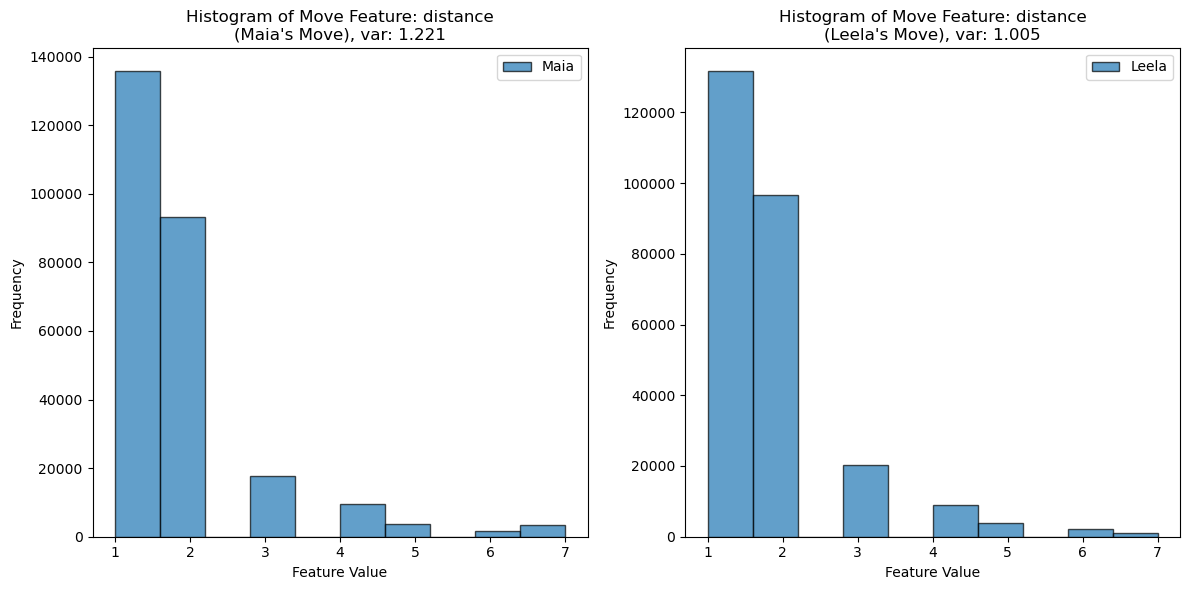

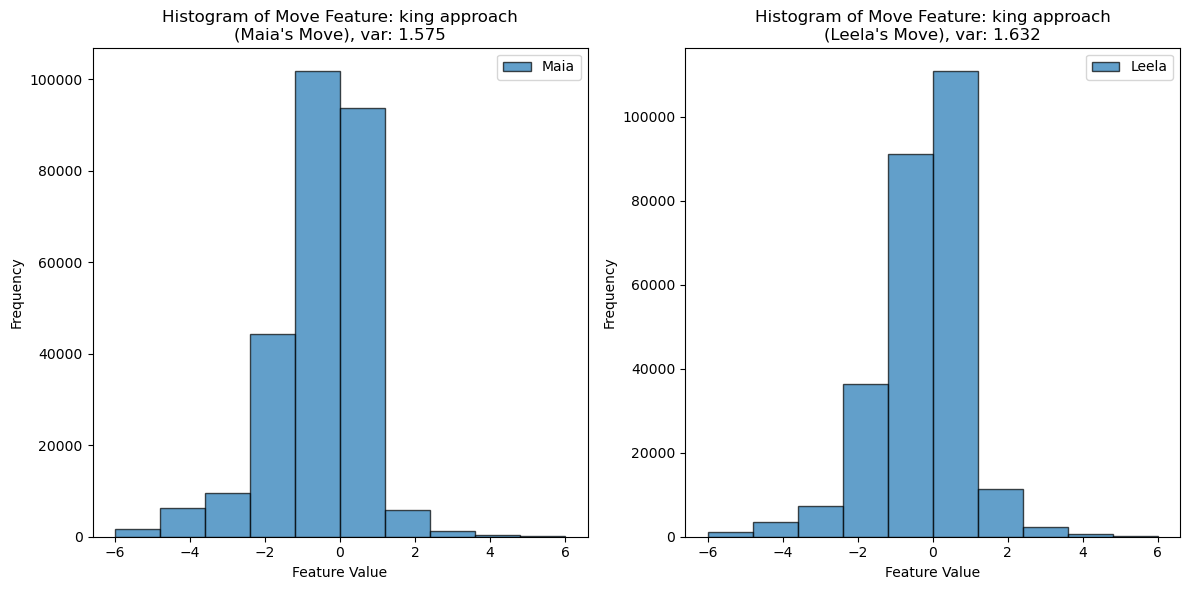

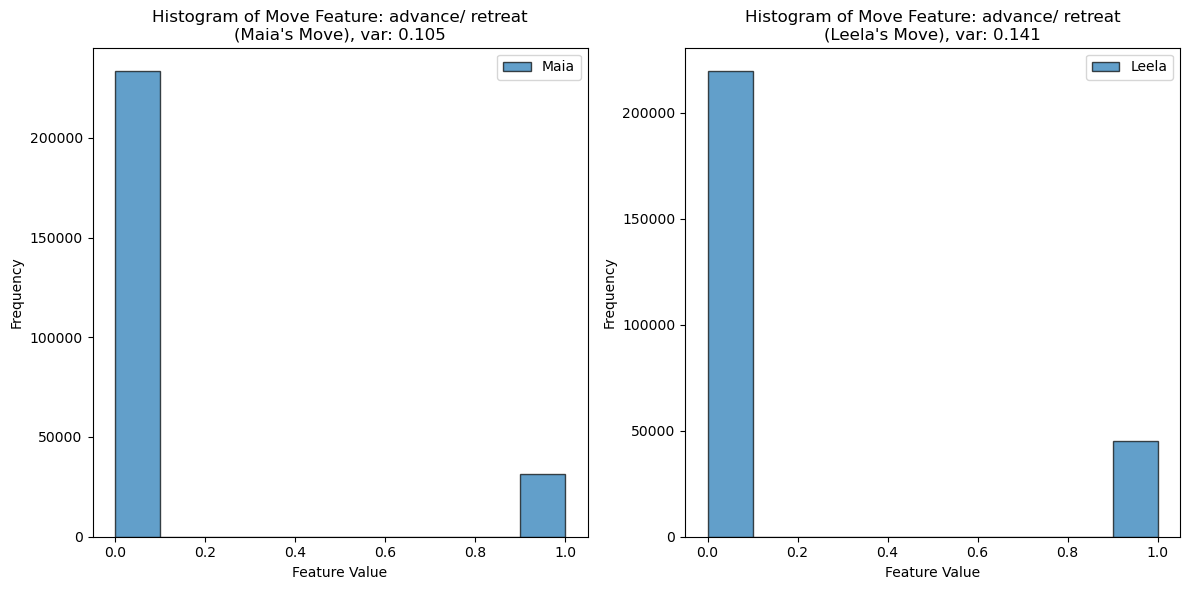

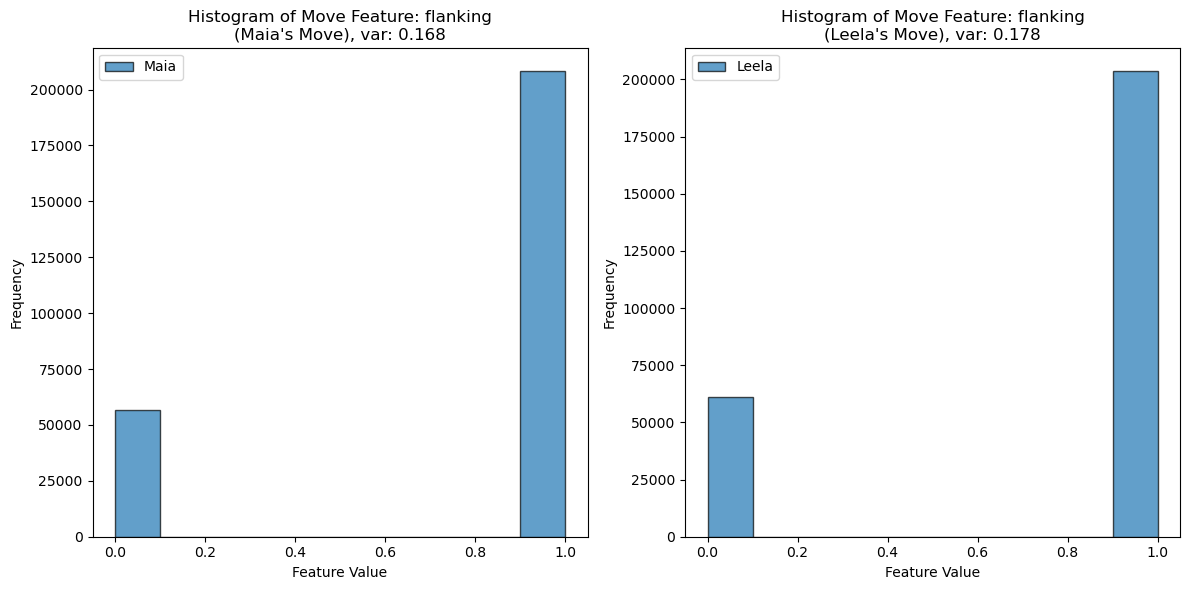

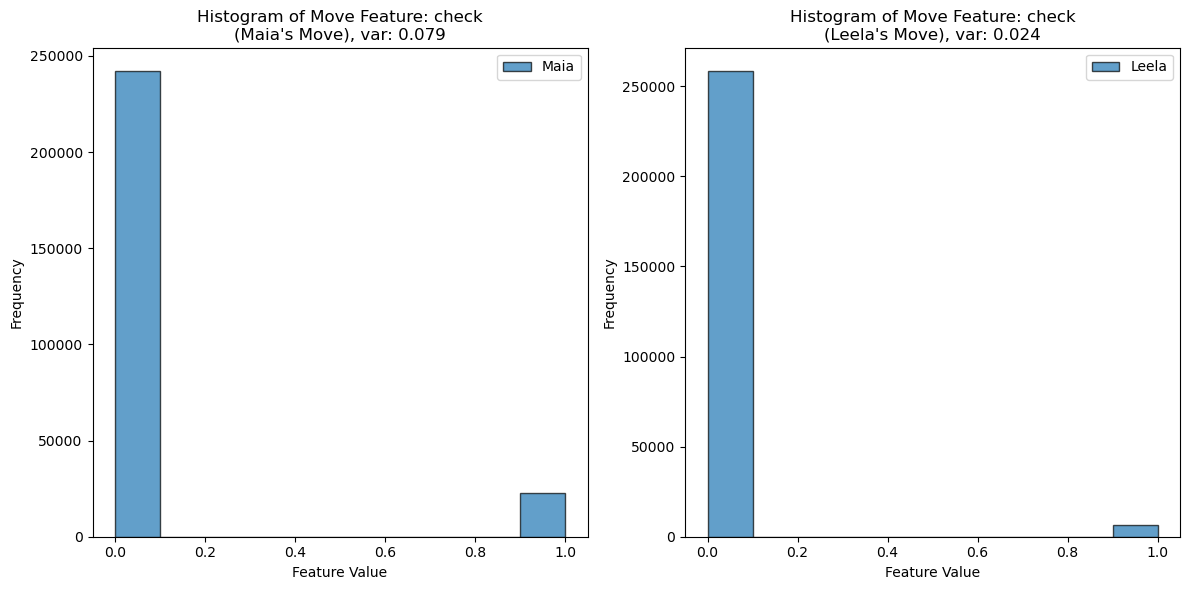

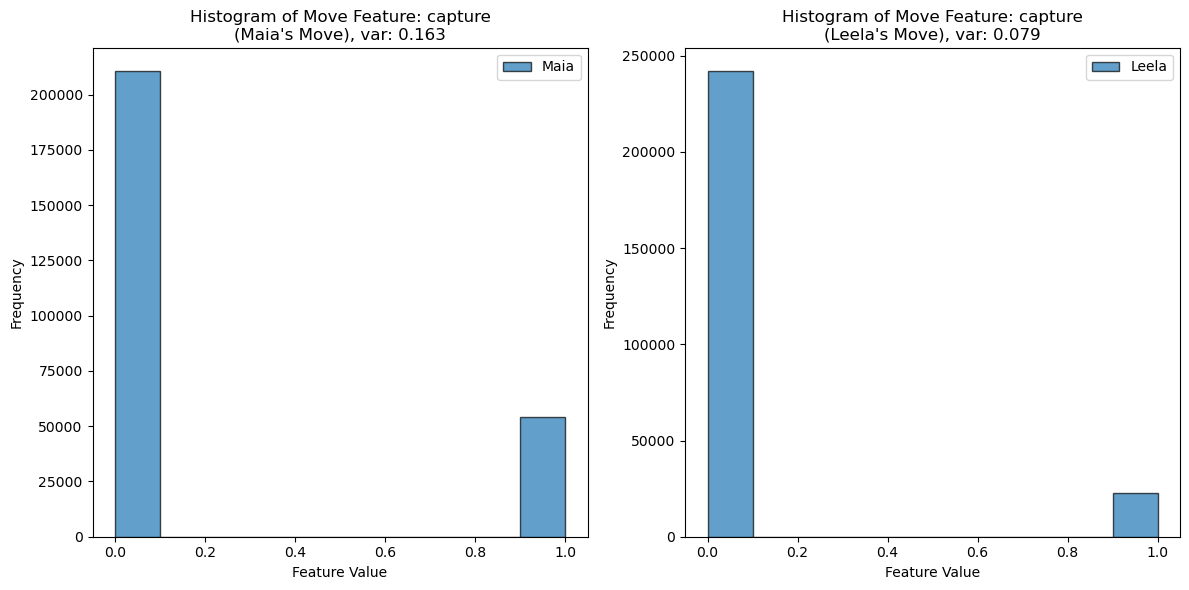

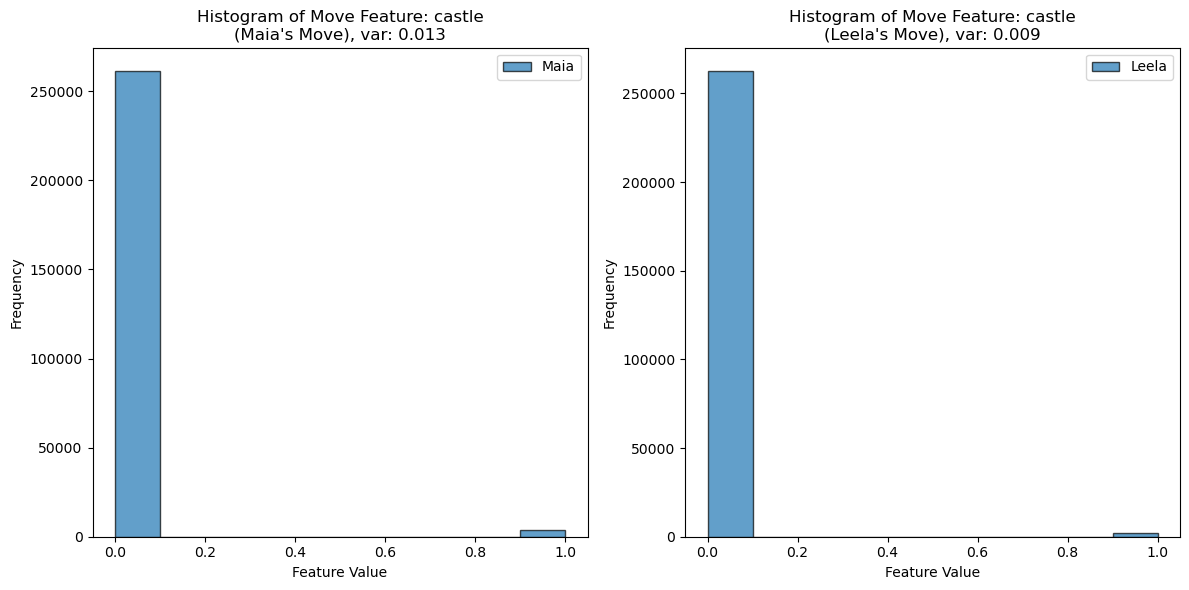

In [145]:
for i in range(vector_array_maia.shape[1]):
    if 4 <= i <= 9:
        continue
    plt.figure(figsize=(12, 6))

    # Create Maia's histogram
    plt.subplot(1, 2, 1)
    plt.hist(vector_array_maia[:, i], bins=10, edgecolor='black', alpha=0.7, label='Maia')
    plt.title(f"Histogram of Move Feature: {feature_names.get(i, f'Feature {i}')}\n(Maia's Move), var: {variance_vector_maia[i].__round__(3)}")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.legend()

    # Create Leela's histogram
    plt.subplot(1, 2, 2)
    plt.hist(vector_array_leela[:, i], bins=10, edgecolor='black', alpha=0.7, label='Leela')
    plt.title(f"Histogram of Move Feature: {feature_names.get(i, f'Feature {i}')}\n(Leela's Move), var: {variance_vector_leela[i].__round__(3)}")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.legend()

    plt.tight_layout()
    plt.show()

Now, we'll look for the situations in which the difference between Maia's eval and Leela's eval was the largest in favor of Maia, and check if we can find a pattern.


Color: black, Maia's move: e4g3, Leela's move: h4h3, result: win, Maia's eval: 1.0, Leela's eval: 0.0, Moves to end: [('a8e8', 'agreed'), ('d6g3', 'agreed'), ('h4g3', 'agreed'), ('d4f3', 'agreed'), ('f3h2', 'agreed'), ('g3g2', 'agreed'), ('h2f3', 'agreed'), ('g2f3', 'agreed'), ('e8e3', 'agreed'), ('f3e3', 'agreed'), ('f5f4', 'agreed'), ('f4f3', 'maia1200'), ('e3g5', 'agreed'), ('g5g2', 'agreed'), ('f3f2', 'agreed'), ('g2g3', 'agreed'), ('h7h5', 'leela10b2500'), ('h5h4', 'agreed'), ('g8h7', 'agreed'), ('h4h3', 'agreed'), ('g3g2', 'agreed'), ('g2g4', 'agreed'), ('g4g3', 'agreed'), ('h3h2', 'agreed'), ('g3h2', 'agreed'), ('g7g5', 'maia1200'), ('g5g4', 'agreed'), ('h7g7', 'leela10b2500'), ('g4g3', 'agreed'), ('g3g2', 'agreed'), ('g2g1q', 'agreed'), ('g1g3', 'maia1200'), ('g3g2', 'leela10b2500'), ('g2c2', 'agreed'), ('g7f6', 'leela10b2500'), ('h2d2', 'maia1200')]


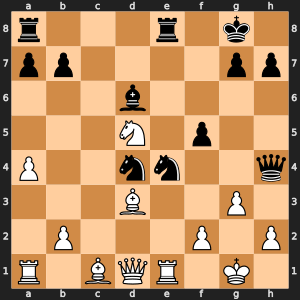

Color: white, Maia's move: d1d2, Leela's move: d1f3, result: win, Maia's eval: 1.0, Leela's eval: 0.0, Moves to end: [('f1e2', 'agreed'), ('g5f3', 'agreed'), ('c2b3', 'agreed'), ('d2h6', 'agreed'), ('h4f6', 'agreed'), ('e2f2', 'maia1200'), ('e1e3', 'agreed'), ('f2e3', 'agreed'), ('a1f1', 'leela10b2500'), ('h6g7', 'agreed')]


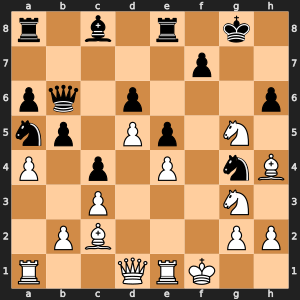

Color: black, Maia's move: b6c4, Leela's move: a5c4, result: draw, Maia's eval: 1.0, Leela's eval: 0.0, Moves to end: [('b8b1', 'agreed'), ('b1b2', 'agreed'), ('c4b2', 'agreed'), ('a5c6', 'agreed'), ('c6e5', 'agreed'), ('b2d3', 'agreed'), ('d3c5', 'leela10b2500'), ('g6g5', 'agreed'), ('h6g6', 'agreed'), ('g5g4', 'agreed'), ('g6g5', 'agreed'), ('g4g3', 'agreed'), ('g5g4', 'agreed'), ('d6e7', 'agreed'), ('e7f6', 'leela10b2500'), ('f6g5', 'agreed'), ('g5f6', 'leela10b2500'), ('f6g5', 'agreed'), ('e5d7', 'leela10b2500'), ('d7f6', 'agreed'), ('c5d3', 'agreed'), ('g4f3', 'agreed'), ('f6e4', 'agreed'), ('e4d2', 'leela10b2500'), ('d2e4', 'agreed'), ('f3e3', 'agreed'), ('d3f4', 'agreed'), ('e3f3', 'leela10b2500'), ('f4h3', 'maia1200'), ('e4d2', 'leela10b2500'), ('d2e4', 'agreed'), ('f3g3', 'agreed'), ('g3f3', 'agreed'), ('f3e3', 'agreed'), ('e3d3', 'agreed'), ('e4f2', 'leela10b2500'), ('d3d4', 'leela10b2500'), ('f2e4', 'leela10b2500'), ('d4c3', 'agreed'), ('e4d2', 'agreed'), ('c3c2', 'agreed'),

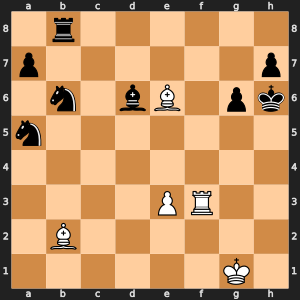

Color: black, Maia's move: e3f2, Leela's move: h6h5, result: win, Maia's eval: 1.0, Leela's eval: 0.0, Moves to end: [('f1f2', 'agreed'), ('h6h5', 'agreed'), ('f2h2', 'agreed'), ('h5h4', 'agreed'), ('c3a4', 'agreed'), ('g6h5', 'maia1200'), ('a4c5', 'agreed'), ('c5d7', 'agreed'), ('h5h4', 'agreed'), ('h4g3', 'leela10b2500'), ('g3f4', 'agreed'), ('h2h3', 'maia1200'), ('f4e5', 'maia1200'), ('e5e4', 'agreed'), ('e4e3', 'leela10b2500'), ('h3f1', 'agreed'), ('f1c4', 'agreed'), ('c4b3', 'agreed'), ('b3c3', 'maia1200'), ('c3d2', 'agreed'), ('e3f3', 'agreed'), ('d2g2', 'agreed')]


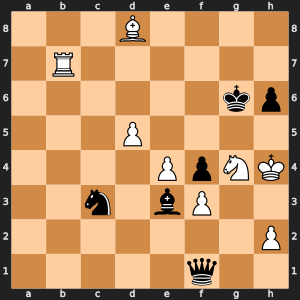

Color: black, Maia's move: c4c6, Leela's move: c4e4, result: lose, Maia's eval: 1.0, Leela's eval: 0.0, Moves to end: [('d5d4', 'agreed'), ('c6g6', 'agreed'), ('g6c2', 'agreed'), ('c2d2', 'agreed'), ('d2h6', 'agreed'), ('e8e6', 'agreed'), ('e6e7', 'agreed'), ('f8e8', 'agreed'), ('h6f6', 'agreed'), ('e7e3', 'maia1200')]


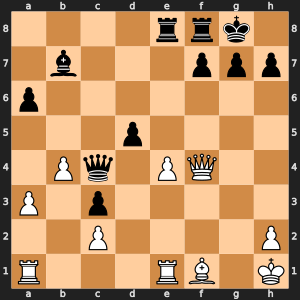

In [146]:
games_df['eval_diff'] = games_df['maia1200_eval'] - games_df['leela10b2500_eval']
top_samples = games_df.nlargest(5, 'eval_diff')
boards = [chess.Board(row['position']) for index, row in top_samples.iterrows()]
for index, row in top_samples.iterrows():
    board = chess.Board(row['position'])
    game_df = games_df[games_df['game'] == row['game']]
    game_df = game_df[game_df['ply'] > row['ply']]
    moves_to_end = []
    for ind, row_ in game_df.iterrows():
        moves_to_end.append((row_['move'], row_['contributor']))
    print(f"Color: {row['color']}, Maia's move: {row['maia1200_move']}, Leela's move: {row['leela10b2500_move']}, result: {row['result']}, Maia's eval: {row['maia1200_eval']}, Leela's eval: {row['leela10b2500_eval']}, Moves to end: {moves_to_end}")
    display(SVG(chess.svg.board(board, size=300)))

In [147]:
maia_1_leela_0 = games_df[games_df['maia1200_eval'] == 1]
maia_1_leela_0 = maia_1_leela_0[maia_1_leela_0['leela10b2500_eval'] == 0]
print(f"Number of situations where Maia has 1 eval and Leela 0: {len(maia_1_leela_0)}")

Number of situations where Maia has 1 eval and Leela 0: 596


The situations in which Leela's eval was much better:

Color: black, Maia's move: e2e3, Leela's move: h7h5, result: win, Maia's eval: 0.0, Leela's eval: 1.0, Moves to end: [('h8g7', 'agreed'), ('c6b5', 'agreed'), ('h5h4', 'agreed'), ('h4h3', 'agreed'), ('h3h2', 'agreed'), ('e2c2', 'agreed'), ('c2c1', 'agreed'), ('g7f7', 'agreed'), ('c1a3', 'agreed'), ('a3c3', 'agreed')]


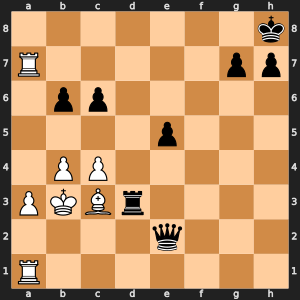

Color: white, Maia's move: g4f3, Leela's move: c1f4, result: win, Maia's eval: 0.0, Leela's eval: 1.0, Moves to end: [('g3g4', 'agreed'), ('b5a6', 'agreed'), ('b2b4', 'agreed'), ('b4c5', 'agreed'), ('a1b1', 'agreed'), ('b1b7', 'agreed'), ('f1b1', 'agreed'), ('b1b6', 'agreed'), ('b7b8', 'agreed'), ('b6c6', 'agreed'), ('c2c5', 'agreed'), ('c5c6', 'agreed'), ('c6e6', 'maia1200'), ('g4f5', 'agreed'), ('e6d6', 'agreed'), ('a6a7', 'agreed'), ('f4g5', 'maia1200'), ('g5e3', 'agreed'), ('a7a8q', 'agreed')]


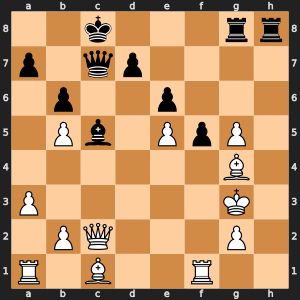

Color: black, Maia's move: e4g2, Leela's move: g5e5, result: win, Maia's eval: 0.0, Leela's eval: 1.0, Moves to end: [('e5g3', 'agreed'), ('e4f3', 'maia1200'), ('f8f3', 'agreed'), ('a8f8', 'agreed'), ('f3d3', 'agreed'), ('f8d8', 'agreed'), ('g8f7', 'agreed'), ('f7f6', 'agreed'), ('h7h5', 'leela10b2500'), ('g7g5', 'agreed'), ('h5h4', 'agreed'), ('g5h4', 'agreed'), ('d8g8', 'leela10b2500'), ('g8g3', 'agreed'), ('f6e7', 'agreed'), ('e7d6', 'agreed'), ('d6d7', 'leela10b2500'), ('d7d6', 'agreed'), ('d6d7', 'agreed'), ('g3g4', 'agreed'), ('g4b4', 'agreed'), ('d7c8', 'agreed'), ('b4a4', 'agreed'), ('a4e4', 'agreed'), ('e4e1', 'maia1200'), ('e1d1', 'agreed'), ('d1e1', 'agreed'), ('e1d1', 'agreed'), ('d1e1', 'agreed'), ('e1e6', 'leela10b2500'), ('c8d8', 'agreed'), ('d8d7', 'agreed'), ('e6d6', 'agreed'), ('d6f6', 'agreed'), ('f6f1', 'maia1200'), ('f1h1', 'agreed'), ('h1g1', 'maia1200'), ('g1h1', 'agreed'), ('h1g1', 'agreed'), ('g1f1', 'agreed'), ('d7e6', 'agreed'), ('f1g1', 'agreed'), ('g1h1', '

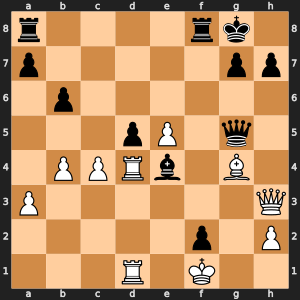

Color: white, Maia's move: b8a6, Leela's move: e1d2, result: draw, Maia's eval: 0.0, Leela's eval: 1.0, Moves to end: [('b8a6', 'agreed'), ('d2c3', 'agreed'), ('c3b4', 'agreed'), ('b4a5', 'maia1200'), ('a6c5', 'leela10b2500'), ('c5b3', 'agreed'), ('b3d2', 'agreed'), ('a5b5', 'maia1200'), ('a4a5', 'maia1200'), ('d2b1', 'agreed'), ('b1a3', 'maia1200'), ('a3b1', 'agreed'), ('a5a6', 'agreed'), ('a6a7', 'agreed'), ('a7a8q', 'agreed'), ('b5c4', 'agreed'), ('c4d4', 'agreed'), ('d4d3', 'leela10b2500'), ('d3e4', 'agreed'), ('e4e5', 'maia1200'), ('e5f5', 'leela10b2500'), ('f5g4', 'maia1200'), ('g4f3', 'agreed'), ('f3g4', 'agreed'), ('g4f3', 'agreed'), ('f3e4', 'agreed'), ('e4d4', 'agreed'), ('d4e4', 'leela10b2500'), ('e4d4', 'agreed'), ('d4e4', 'agreed'), ('e4d4', 'agreed'), ('d4e4', 'agreed'), ('e4d4', 'agreed'), ('d4e5', 'agreed'), ('e5d5', 'agreed'), ('d5e5', 'agreed'), ('e5d5', 'agreed'), ('d5d4', 'agreed'), ('d4d3', 'agreed'), ('d3c4', 'agreed'), ('c4d5', 'maia1200'), ('d5d4', 'agreed'), ('

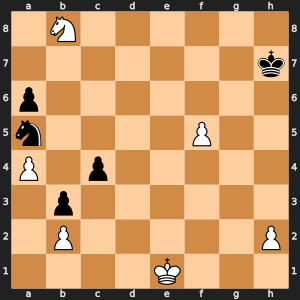

Color: white, Maia's move: b2c3, Leela's move: a6c5, result: draw, Maia's eval: 0.0, Leela's eval: 1.0, Moves to end: [('c5b3', 'agreed'), ('b3d2', 'agreed'), ('a5b5', 'maia1200'), ('a4a5', 'maia1200'), ('d2b1', 'agreed'), ('b1a3', 'maia1200'), ('a3b1', 'agreed'), ('a5a6', 'agreed'), ('a6a7', 'agreed'), ('a7a8q', 'agreed'), ('b5c4', 'agreed'), ('c4d4', 'agreed'), ('d4d3', 'leela10b2500'), ('d3e4', 'agreed'), ('e4e5', 'maia1200'), ('e5f5', 'leela10b2500'), ('f5g4', 'maia1200'), ('g4f3', 'agreed'), ('f3g4', 'agreed'), ('g4f3', 'agreed'), ('f3e4', 'agreed'), ('e4d4', 'agreed'), ('d4e4', 'leela10b2500'), ('e4d4', 'agreed'), ('d4e4', 'agreed'), ('e4d4', 'agreed'), ('d4e4', 'agreed'), ('e4d4', 'agreed'), ('d4e5', 'agreed'), ('e5d5', 'agreed'), ('d5e5', 'agreed'), ('e5d5', 'agreed'), ('d5d4', 'agreed'), ('d4d3', 'agreed'), ('d3c4', 'agreed'), ('c4d5', 'maia1200'), ('d5d4', 'agreed'), ('d4d3', 'agreed'), ('d3d4', 'agreed'), ('d4c5', 'agreed'), ('c5d6', 'agreed'), ('d6e5', 'maia1200'), ('e5d6',

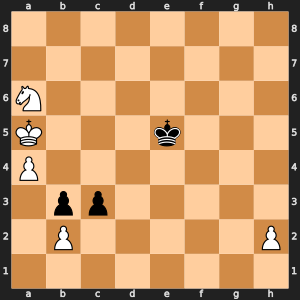

In [148]:
games_df["eval_diff"] = games_df["maia1200_eval"] - games_df["leela10b2500_eval"]
top_samples = games_df.nsmallest(5, 'eval_diff')
boards = [chess.Board(row['position']) for index, row in top_samples.iterrows()]
for index, row in top_samples.iterrows():
    game_df = games_df[games_df['game'] == row['game']]
    game_df = game_df[game_df['ply'] > row['ply']]
    moves_to_end = []
    for ind, row_ in game_df.iterrows():
        moves_to_end.append((row_['move'], row_['contributor']))
    board = chess.Board(row['position'])
    print(f"Color: {row['color']}, Maia's move: {row['maia1200_move']}, Leela's move: {row['leela10b2500_move']}, result: {row['result']}, Maia's eval: {row['maia1200_eval']}, Leela's eval: {row['leela10b2500_eval']}, Moves to end: {moves_to_end}")
    display(SVG(chess.svg.board(board, size=300)))

In [149]:
maia_0_leela_1 = games_df[games_df['maia1200_eval'] == 0]
maia_0_leela_1 = maia_0_leela_1[maia_0_leela_1['leela10b2500_eval'] == 1]
print(f"Number of situations where Maia has 0 eval and Leela 1: {len(maia_0_leela_1)}")

Number of situations where Maia has 0 eval and Leela 1: 863


In [150]:
maia_counts = disagreement_df.groupby('game')['contributor'].value_counts().unstack().fillna(0)['maia1200']
game_counts = disagreement_df['game'].value_counts().sort_index()
cur_game, cur_count, cur_total = -1, -1, -1
disagreement_df['maia_percent'] = 0
for index, row in disagreement_df.iterrows():
    if cur_game != row['game']:
        cur_game = row['game']
        cur_total = game_counts[cur_game]
        cur_count = maia_counts[cur_game]
    if row['contributor'] == 'maia1200':
        cur_count -= 1
        cur_total -= 1
    else:
        cur_total -= 1
    if cur_total == 0:
        disagreement_df.loc[index, 'maia_percent'] = 100
        continue
    disagreement_df.loc[index, 'maia_percent'] = (cur_count / cur_total) * 100

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_14860/677063981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disagreement_df['maia_percent'] = 0


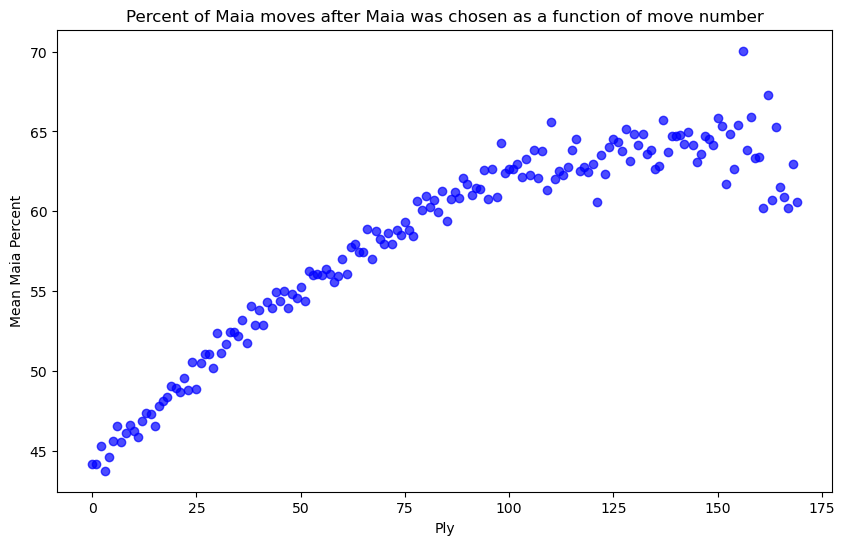

In [151]:
maia_per_df = disagreement_df[disagreement_df['contributor'] == 'maia1200']
maia_per_df = maia_per_df[maia_per_df['ply'] < 170]
plt.figure(figsize=(10, 6))  # Set the figure size
mean_percent_by_move = maia_per_df.groupby('ply')['maia_percent'].mean()

plt.scatter(mean_percent_by_move.index, mean_percent_by_move.values, color='blue', marker='o', alpha=0.7)
plt.title('Percent of Maia moves after Maia was chosen as a function of move number')
plt.xlabel('Ply')
plt.ylabel('Mean Maia Percent')
plt.show()

In [152]:
leela_counts = disagreement_df.groupby('game')['contributor'].value_counts().unstack().fillna(0)['leela10b2500']
cur_game, cur_count, cur_total = -1, -1, -1
disagreement_df['leela_percent'] = 0
for index, row in disagreement_df.iterrows():
    if cur_game != row['game']:
        cur_game = row['game']
        cur_total = game_counts[cur_game]
        cur_count = leela_counts[cur_game]
    if row['contributor'] == 'leela10b2500':
        cur_count -= 1
        cur_total -= 1
    else:
        cur_total -= 1
    if cur_total == 0:
        disagreement_df.loc[index, 'leela_percent'] = 100
        continue
    disagreement_df.loc[index, 'leela_percent'] = (cur_count / cur_total) * 100

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_14860/201211316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disagreement_df['leela_percent'] = 0


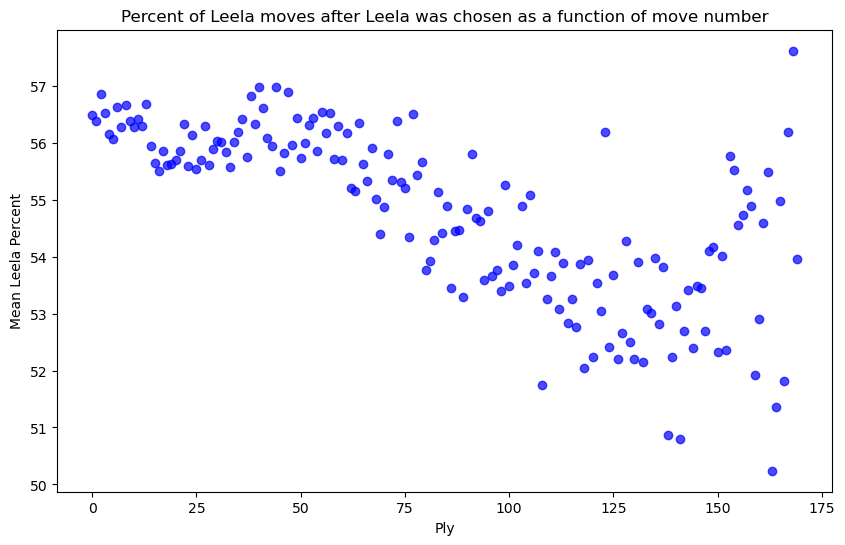

In [153]:
leela_per_df = disagreement_df[disagreement_df['contributor'] == 'leela10b2500']
leela_per_df = leela_per_df[leela_per_df['ply'] < 170]
plt.figure(figsize=(10, 6))  # Set the figure size
leela_percent_by_move = leela_per_df.groupby('ply')['leela_percent'].mean()

plt.scatter(leela_percent_by_move.index, leela_percent_by_move.values, color='blue', marker='o', alpha=0.7)
plt.title('Percent of Leela moves after Leela was chosen as a function of move number')
plt.xlabel('Ply')
plt.ylabel('Mean Leela Percent')
plt.show()

In [154]:
def calculate_percent_after_chosen(total, bot_name):
    ctr = 0
    cur_game = -1
    cur_bot = False
    for index, row in disagreement_df.iterrows():
        cur_ply = row['ply']
        if cur_game != row['game']:
            cur_game = row['game']
            cur_bot = False
            continue
        if row['contributor'] == bot_name:
            if cur_bot:
                ctr += 1
            cur_bot = True
        else:
            cur_bot = False
    return (ctr / total) * 100

In [155]:
percent_maia = calculate_percent_after_chosen(len(maia_better_df), 'maia1200')
percent_leela = calculate_percent_after_chosen(len(leela_better_df), 'leela10b2500')
print(f"Percentage of times Maia is chosen in disagreements: {(len(maia_df) / len(disagreement_df) * 100).__round__(3)}%")
print(f"Percentage of times Maia is chosen after it was chosen the previous move: {percent_maia.__round__(3)}%")
print(f"Percentage of times Leela is chosen in disagreements: {(len(leela_df) / len(disagreement_df) * 100).__round__(3)}%")
print(f"Percentage of times Leela is chosen after it was chosen the previous move: {percent_leela.__round__(3)}%")

Percentage of times Maia is chosen in disagreements: 44.278%
Percentage of times Maia is chosen after it was chosen the previous move: 97.055%
Percentage of times Leela is chosen in disagreements: 55.722%
Percentage of times Leela is chosen after it was chosen the previous move: 88.717%


In [156]:
def calculate_percent_of_combination(total, bot_name1, bot_name2):
    ctr = 0
    cur_game = -1
    cur_bot = None
    for index, row in disagreement_df.iterrows():
        if cur_game != row['game']:
            cur_game = row['game']
            cur_bot = row['contributor']
            continue
        if cur_bot == bot_name1 and row['contributor'] == bot_name2:
            ctr += 1
        cur_bot = row['contributor']
    return (ctr / total) * 100

In [157]:
print(f"Percentage of the bigram 'Maia-Maia': {calculate_percent_of_combination(len(disagreement_df), 'maia1200', 'maia1200').__round__(3)}%")
print(f"Percentage of the bigram 'Maia-Leela': {calculate_percent_of_combination(len(disagreement_df), 'maia1200', 'leela10b2500').__round__(3)}%")
print(f"Percentage of the bigram 'Leela-Maia': {calculate_percent_of_combination(len(disagreement_df), 'leela10b2500', 'maia1200').__round__(3)}%")
print(f"Percentage of the bigram 'Leela-Leela': {calculate_percent_of_combination(len(disagreement_df), 'leela10b2500', 'leela10b2500').__round__(3)}%")

Percentage of the bigram 'Maia-Maia': 18.496%
Percentage of the bigram 'Maia-Leela': 21.024%
Percentage of the bigram 'Leela-Maia': 22.351%
Percentage of the bigram 'Leela-Leela': 29.186%


In [158]:
def calculate_percent_of_combination_3(total, bot_name1, bot_name2, bot_name3):
    ctr = 0
    cur_game = -1
    cur_bots = [None, None, None]

    for index, row in disagreement_df.iterrows():
        if cur_game != row['game']:
            cur_game = row['game']
            cur_bots = [None, None, None]
            continue

        cur_bots.pop(0)
        cur_bots.append(row['contributor'])

        if cur_bots[0] == bot_name1 and cur_bots[1] == bot_name2 and cur_bots[2] == bot_name3:
            ctr += 1

    return (ctr / total) * 100

In [159]:
from itertools import product

names = ['maia1200', 'leela10b2500']

permutations_of_3 = list(product(names, repeat=3))
for perm in permutations_of_3:
    print(f"Percentage of the trigram {perm[0]}, {perm[1]}, {perm[2]}: {calculate_percent_of_combination_3(len(disagreement_df), perm[0], perm[1], perm[2]).__round__(3)}%")

Percentage of the trigram maia1200, maia1200, maia1200: 7.057%
Percentage of the trigram maia1200, maia1200, leela10b2500: 7.562%
Percentage of the trigram maia1200, leela10b2500, maia1200: 7.888%
Percentage of the trigram maia1200, leela10b2500, leela10b2500: 9.279%
Percentage of the trigram leela10b2500, maia1200, maia1200: 8.556%
Percentage of the trigram leela10b2500, maia1200, leela10b2500: 9.606%
Percentage of the trigram leela10b2500, leela10b2500, maia1200: 10.409%
Percentage of the trigram leela10b2500, leela10b2500, leela10b2500: 13.185%


In [160]:
def calculate_percent_of_combination_4(total, bot_name1, bot_name2, bot_name3, bot_name4):
    ctr = 0
    cur_game = -1
    cur_bots = [None, None, None, None]

    for index, row in disagreement_df.iterrows():
        if cur_game != row['game']:
            cur_game = row['game']
            cur_bots = [None, None, None, None]
            continue

        cur_bots.pop(0)
        cur_bots.append(row['contributor'])

        if cur_bots[0] == bot_name1 and cur_bots[1] == bot_name2 and cur_bots[2] == bot_name3 and cur_bots[3] == bot_name4:
            ctr += 1

    return (ctr / total) * 100

In [161]:
from itertools import product

names = ['maia1200', 'leela10b2500']

permutations_of_4 = list(product(names, repeat=4))
for perm in permutations_of_4:
    print(f"Percentage of the quadgram {perm[0]}, {perm[1]}, {perm[2]}, {perm[3]}: {calculate_percent_of_combination_4(len(disagreement_df), perm[0], perm[1], perm[2], perm[3]).__round__(3)}%")

Percentage of the quadgram maia1200, maia1200, maia1200, maia1200: 2.893%
Percentage of the quadgram maia1200, maia1200, maia1200, leela10b2500: 2.983%
Percentage of the quadgram maia1200, maia1200, leela10b2500, maia1200: 3.148%
Percentage of the quadgram maia1200, maia1200, leela10b2500, leela10b2500: 3.575%
Percentage of the quadgram maia1200, leela10b2500, maia1200, maia1200: 3.304%
Percentage of the quadgram maia1200, leela10b2500, maia1200, leela10b2500: 3.574%
Percentage of the quadgram maia1200, leela10b2500, leela10b2500, maia1200: 3.809%
Percentage of the quadgram maia1200, leela10b2500, leela10b2500, leela10b2500: 4.554%
Percentage of the quadgram leela10b2500, maia1200, maia1200, maia1200: 3.538%
Percentage of the quadgram leela10b2500, maia1200, maia1200, leela10b2500: 3.814%
Percentage of the quadgram leela10b2500, maia1200, leela10b2500, maia1200: 3.993%
Percentage of the quadgram leela10b2500, maia1200, leela10b2500, leela10b2500: 4.644%
Percentage of the quadgram leela

Now, we'll check what's the distribution of eval_diff. A positive eval_diff means that the difference is in favor of Maia, negative is in favor of Leela.

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_14860/2739009164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disagreement_df['eval_diff'] = disagreement_df['maia1200_eval'] - disagreement_df['leela10b2500_eval']


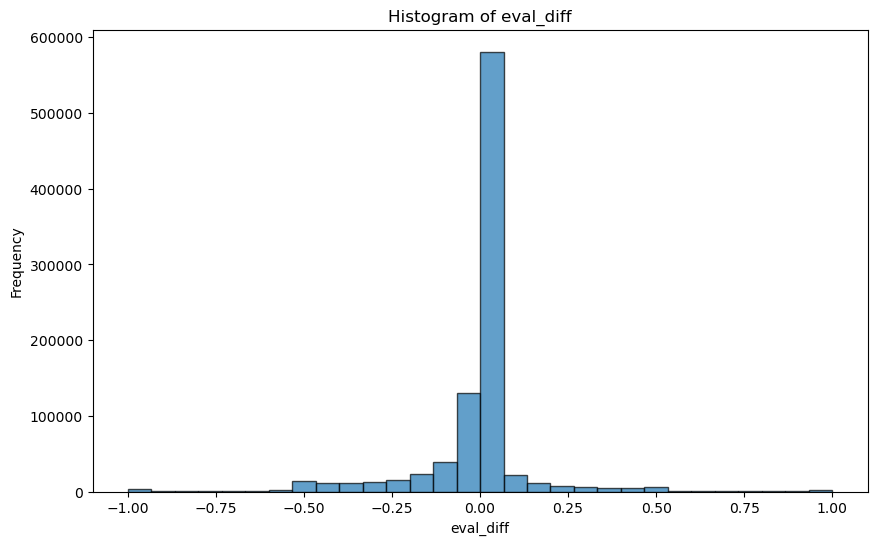

In [162]:
disagreement_df['eval_diff'] = disagreement_df['maia1200_eval'] - disagreement_df['leela10b2500_eval']
val_diff_counts = disagreement_df['eval_diff'].value_counts()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Specify the number of bins you want (e.g., 20 for more bins)
num_bins = 30

plt.hist(disagreement_df['eval_diff'], bins=num_bins, edgecolor='k', alpha=0.7)
plt.xlabel('eval_diff')
plt.ylabel('Frequency')
plt.title('Histogram of eval_diff')

plt.show()

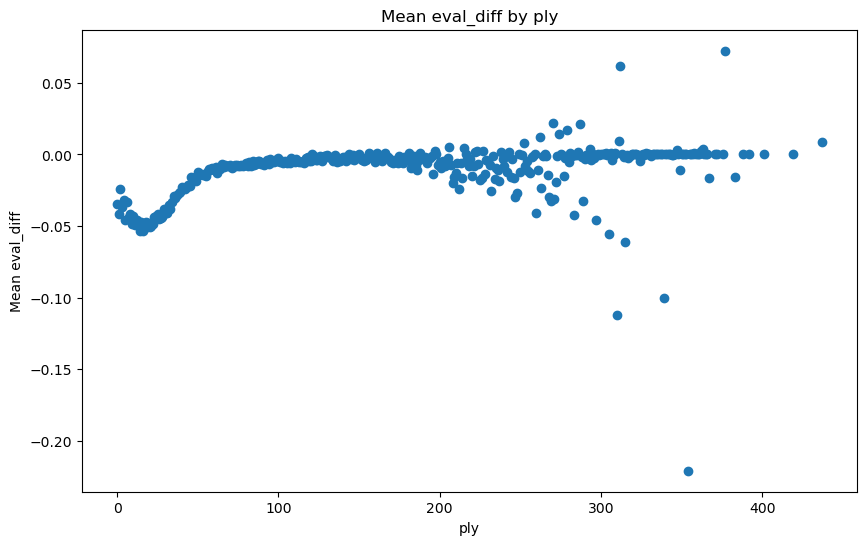

In [163]:
mean_eval_diff_by_ply = disagreement_df.groupby('ply')['eval_diff'].mean().reset_index()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(mean_eval_diff_by_ply['ply'], mean_eval_diff_by_ply['eval_diff'], marker='o', linestyle='')
plt.xlabel('ply')
plt.ylabel('Mean eval_diff')
plt.title('Mean eval_diff by ply')
plt.show()

In [164]:
board_feats_disagreements['maia1200_eval'] = disagreement_df['maia1200_eval']
board_feats_disagreements['leela10b2500_eval'] = disagreement_df[
    'leela10b2500_eval']
correlation_matrix_feats = board_feats_disagreements.corr()
for col, series in board_feats_disagreements.iteritems():
    if col not in ['maia1200_eval', 'leela10b2500_eval']:
        print(
            f"Correlation between {col} and Maia score: {correlation_matrix_feats.loc['maia1200_eval', col].__round__(3)}")
        print(
            f"Correlation between {col} and Leela score: {correlation_matrix_feats.loc['leela10b2500_eval', col].__round__(3)}")

Correlation between color and Maia score: 0.003
Correlation between color and Leela score: 0.003
Correlation between move_num and Maia score: 0.001
Correlation between move_num and Leela score: -0.0
Correlation between legal_moves_player and Maia score: 0.004
Correlation between legal_moves_player and Leela score: 0.006
Correlation between legal_moves_opponent and Maia score: 0.004
Correlation between legal_moves_opponent and Leela score: 0.003
Correlation between legal_captures_player and Maia score: 0.002
Correlation between legal_captures_player and Leela score: 0.003
Correlation between legal_captures_opponent and Maia score: 0.001
Correlation between legal_captures_opponent and Leela score: 0.0
Correlation between in_check and Maia score: 0.0
Correlation between in_check and Leela score: -0.002
Correlation between check_to_give_player and Maia score: -0.003
Correlation between check_to_give_player and Leela score: -0.001
Correlation between check_to_give_opponent and Maia score: 0

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_14860/2187653519.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, series in board_feats_disagreements.iteritems():


In [165]:
board_feats_disagreements['eval_diff'] = disagreement_df['eval_diff']
correlation_matrix_feats = board_feats_disagreements.corr()
for col, series in board_feats_disagreements.iteritems():
    if col not in ['maia1200_eval', 'leela10b2500_eval', 'eval_diff']:
        print(
            f"Correlation between {col} and eval difference: {correlation_matrix_feats.loc['eval_diff', col].__round__(3)}")

Correlation between color and eval difference: -0.001
Correlation between move_num and eval difference: 0.002
Correlation between legal_moves_player and eval difference: -0.004
Correlation between legal_moves_opponent and eval difference: 0.002
Correlation between legal_captures_player and eval difference: -0.001
Correlation between legal_captures_opponent and eval difference: 0.0
Correlation between in_check and eval difference: 0.004
Correlation between check_to_give_player and eval difference: -0.004
Correlation between check_to_give_opponent and eval difference: 0.002
Correlation between queen_threatened_player and eval difference: 0.004
Correlation between queen_threatened_opponent and eval difference: 0.001
Correlation between castling_rights_player and eval difference: -0.002
Correlation between castling_rights_opponent and eval difference: -0.002
Correlation between enough_material_to_win_player and eval difference: 0.002
Correlation between enough_material_to_win_opponent and 

/var/folders/c_/fhx1wcfx75v13kxh3lwr6jrc0000gn/T/ipykernel_14860/962654341.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, series in board_feats_disagreements.iteritems():


Now, we'll perform PCA. First, we'll check the lowest dimension which preserves 95% of the variance, then check what features are most important.

In [178]:
board_feats_disagreements = pd.read_csv("../teacher_set_disagreement.csv")

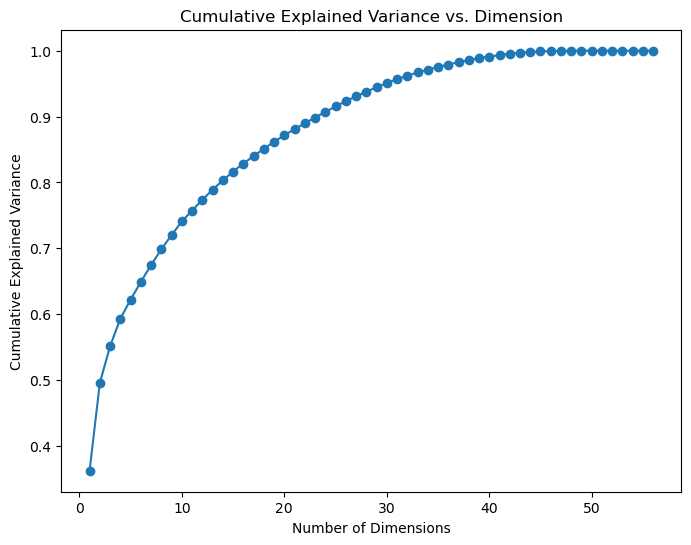

Number of dimensions needed to preserve 95% of variance is 29


In [179]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
board_transformed = imputer.fit_transform(board_feats_disagreements)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(board_transformed)
pca = PCA()
pca.fit(scaled_data)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance vs. Dimension')
plt.xlabel('Number of Dimensions')
plt.ylabel('Cumulative Explained Variance')
plt.show()
for i, n in enumerate(cumulative_variance):
    if n > 0.95:
        print(f"Number of dimensions needed to preserve 95% of variance is {i}")
        break

In [199]:
pca = PCA(n_components=29)
X_transformed = pca.fit_transform(board_transformed)
principal_components = pca.components_
feature_means_in_pcs = principal_components.mean(axis=0)
feature_mean_df = pd.DataFrame({'Feature': board_feature_names, 'Mean in PCs': feature_means_in_pcs})
first_pc = pd.DataFrame({'Feature': board_feature_names, 'PC': principal_components[0]})
print('First PC:')
print(f'{first_pc}\n')
sorted_feature_mean_df = feature_mean_df.sort_values(by='Mean in PCs', ascending=False)
print('Features sorted in order of importance according to their mean:')
print(sorted_feature_mean_df)

First PC:
                                Feature        PC
0                                 color -0.000233
1                              move_num  0.900171
2                    legal_moves_player -0.083001
3                  legal_moves_opponent -0.227434
4                 legal_captures_player -0.020107
5               legal_captures_opponent -0.019287
6                              in_check  0.000548
7                  check_to_give_player  0.002379
8                check_to_give_opponent -0.000525
9               queen_threatened_player -0.000505
10            queen_threatened_opponent -0.000183
11               castling_rights_player -0.000960
12             castling_rights_opponent -0.001204
13        enough_material_to_win_player  0.000758
14      enough_material_to_win_opponent  0.003220
15                 number_pieces_player -0.072048
16               number_pieces_opponent -0.085510
17               materiel_points_player -0.156792
18             material_points_opponent 

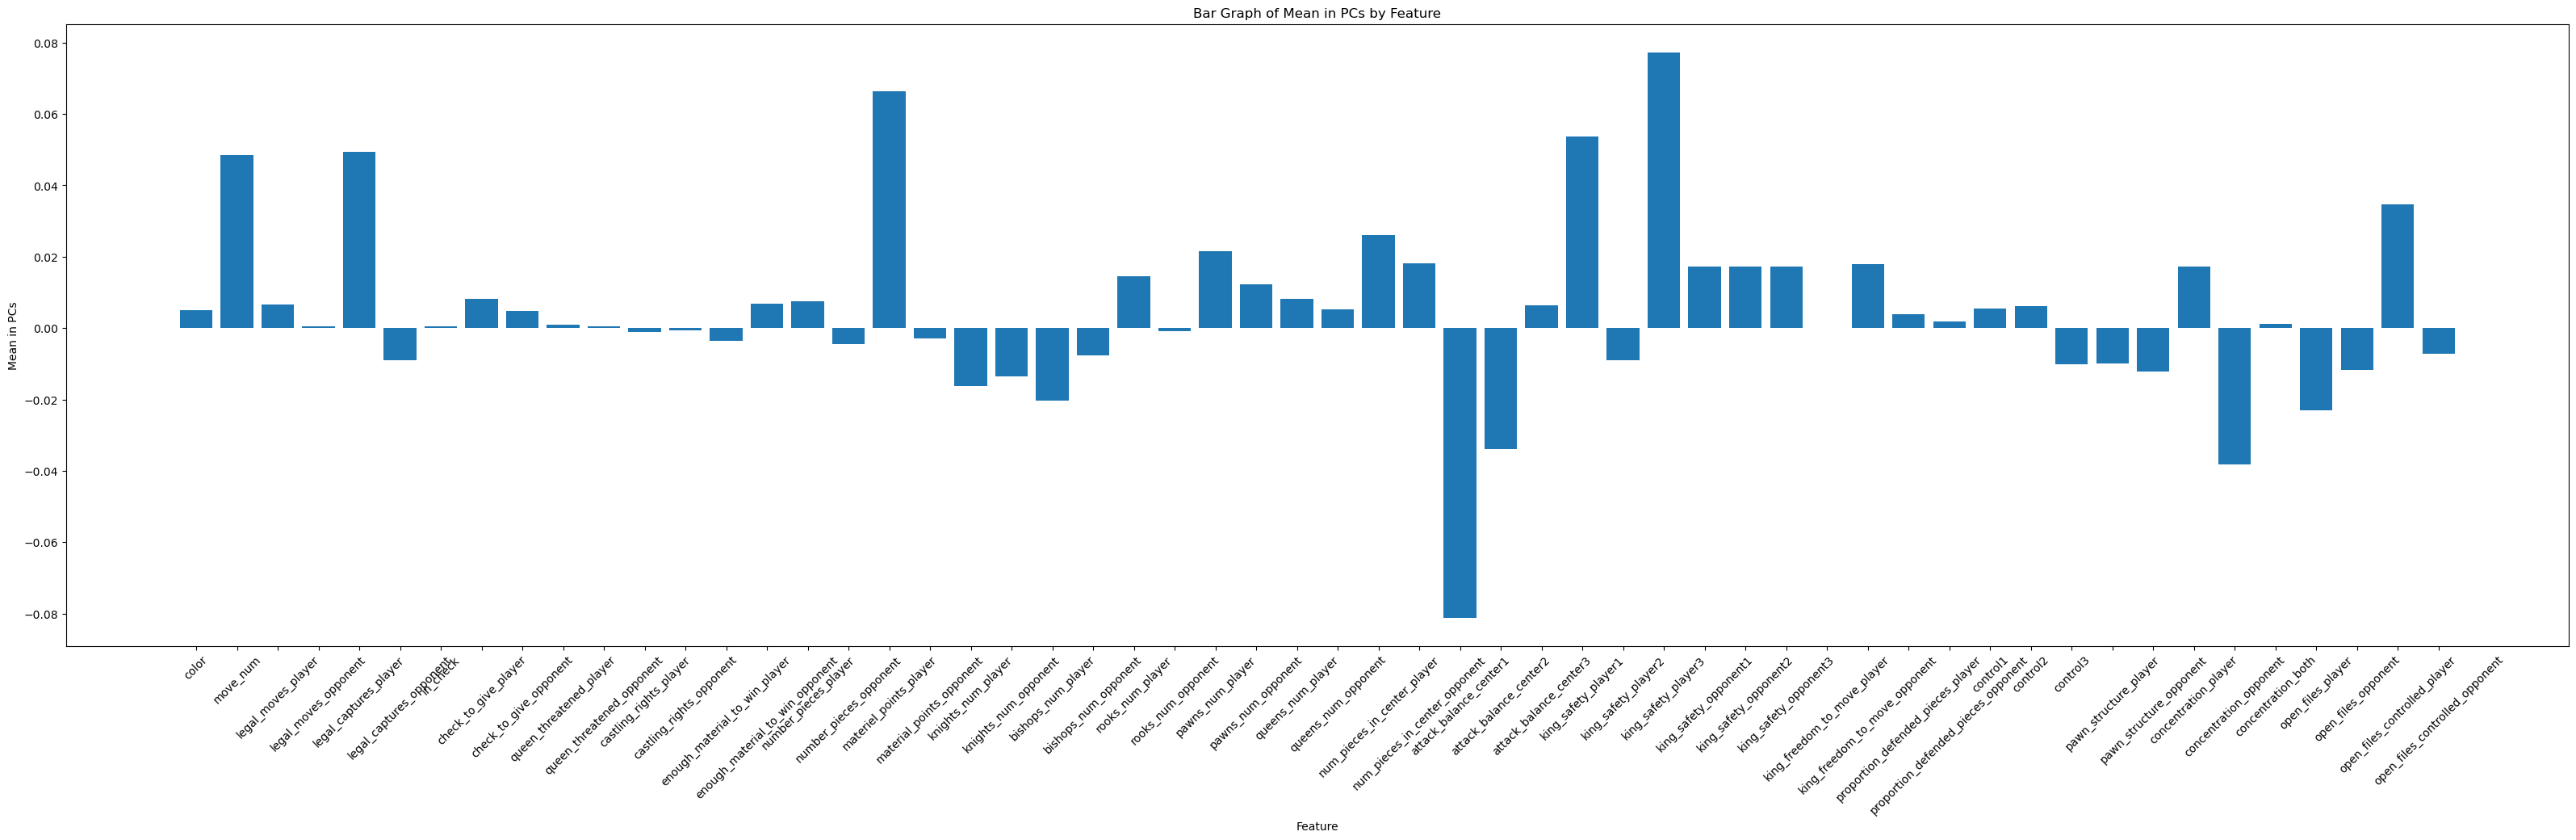

In [214]:
plt.figure(figsize=(40, 10))
plt.bar(feature_mean_df['Feature'], feature_mean_df['Mean in PCs'])

plt.xlabel('Feature')
plt.ylabel('Mean in PCs')
plt.title('Bar Graph of Mean in PCs by Feature')

plt.xticks(rotation=45)
plt.show()

PCA with dimension of 1:

In [186]:
pca = PCA(n_components=1)
X_n1 = pca.fit_transform(board_transformed)
principal_components = pca.components_
feature_means_in_pcs = principal_components.mean(axis=0)
feature_mean_df = pd.DataFrame({'Feature': board_feature_names, 'Mean in PCs': feature_means_in_pcs})
sorted_feature_mean_df = feature_mean_df.sort_values(by='Mean in PCs', ascending=False)
print('Features sorted in order of importance:')
print(sorted_feature_mean_df)

Features sorted in order of importance:
                                Feature  Mean in PCs
1                              move_num     0.900171
53                  open_files_opponent     0.044666
52                    open_files_player     0.040914
39                king_safety_opponent3     0.034111
38                king_safety_opponent2     0.034111
37                king_safety_opponent1     0.034111
34                  king_safety_player1     0.023932
41        king_freedom_to_move_opponent     0.012806
35                  king_safety_player2     0.006573
14      enough_material_to_win_opponent     0.003220
7                  check_to_give_player     0.002379
54         open_files_controlled_player     0.002339
13        enough_material_to_win_player     0.000758
6                              in_check     0.000548
40          king_freedom_to_move_player     0.000000
27                    queens_num_player    -0.000052
10            queen_threatened_opponent    -0.000183
0     

PCA with dimension of 2:

In [187]:
pca = PCA(n_components=2)
X_n1 = pca.fit_transform(board_transformed)
principal_components = pca.components_
feature_means_in_pcs = principal_components.mean(axis=0)
feature_mean_df = pd.DataFrame({'Feature': board_feature_names, 'Mean in PCs': feature_means_in_pcs})
sorted_feature_mean_df = feature_mean_df.sort_values(by='Mean in PCs', ascending=False)
print('Features sorted in order of importance:')
print(sorted_feature_mean_df)

Features sorted in order of importance:
                                Feature  Mean in PCs
1                              move_num     0.457951
2                    legal_moves_player     0.306160
44                             control1     0.225098
17               materiel_points_player     0.086194
37                king_safety_opponent1     0.080535
38                king_safety_opponent2     0.080535
39                king_safety_opponent3     0.080535
31               attack_balance_center1     0.059240
34                  king_safety_player1     0.054200
53                  open_files_opponent     0.028260
52                    open_files_player     0.023294
54         open_files_controlled_player     0.016160
27                    queens_num_player     0.014459
49                 concentration_player     0.007873
7                  check_to_give_player     0.007102
14      enough_material_to_win_opponent     0.005078
51                   concentration_both     0.002624
42    

Linear regression model trained with the PCs:

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y = disagreement_df['eval_diff']

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse.__round__(3)}")
print(f"R-squared: {r2.__round__(3)}")

Mean Squared Error: 0.025
R-squared: 0.014


Using CART:

In [189]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse.__round__(3)}")

Mean Squared Error: 0.043
